<a href="https://colab.research.google.com/github/inbalh1/ML/blob/main/Copy_of_HW1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1 - Data Exploration and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection

In [2]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
 'ytick.labelsize': 18,
 'axes.titlesize' : 22,
 'axes.labelsize' : 20,
 'legend.fontsize': 18,
 'legend.title_fontsize': 22,
 'figure.titlesize': 24
 }
pylab.rcParams.update(params)
pd.set_option('display.max_columns', None)

# Part 1: Data Loading and First Look


## Loading the dataset

In [3]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

rm: cannot remove '*.csv': No such file or directory
Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [4]:
dataset = pd.read_csv(filename)

In [5]:
# (Q1)
dataset.shape

(2500, 28)

In [6]:
# (Q2)
dataset.num_of_siblings.value_counts()

1.0    786
2.0    553
0.0    544
3.0    318
4.0    120
5.0     34
6.0      9
7.0      1
8.0      1
9.0      1
Name: num_of_siblings, dtype: int64

In [7]:
# (Q3)
print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             2500 non-null   int64  
 1   age                    2381 non-null   float64
 2   sex                    2364 non-null   object 
 3   weight                 2367 non-null   float64
 4   blood_type             2359 non-null   object 
 5   address                2372 non-null   object 
 6   current_location       2382 non-null   object 
 7   num_of_siblings        2367 non-null   float64
 8   happiness_score        2389 non-null   float64
 9   household_income       2374 non-null   float64
 10  conversations_per_day  2392 non-null   float64
 11  sugar_levels           2376 non-null   float64
 12  sport_activity         2367 non-null   float64
 13  symptoms               1490 non-null   object 
 14  pcr_date               2382 non-null   object 
 15  PCR_

patient_id   age sex  weight blood_type  \
0        3504   4.0   M    10.7         O+   
1        6236  15.0   F    60.8         A+   
2         939  13.0   F    52.4         O+   
3        5109  15.0   M    49.3         O+   
4        5365  36.0   F    72.2         B+   

                                             address  \
0      38412 Park Road Apt. 628\nYoungland, WA 74405   
1  13683 Sherry Corner Suite 999\nBurnston, DE 73907   
2              555 Ayala Shore\nHannahport, WY 43274   
3  73804 Nicholas Vista Suite 765\nMichaelview, N...   
4   105 Hodge Ports Apt. 430\nSouth Robert, NV 37851   

             current_location  num_of_siblings  happiness_score  \
0   ('26.18924', '-98.15529')              4.0              8.0   
1   ('33.41012', '-91.06177')              2.0              6.0   
2  ('-37.32167', '-59.13316')              0.0              8.0   
3     ('9.57046', '76.32756')              5.0              8.0   
4  ('44.99012', '-123.02621')              1.0              6.0   

   household_income  conversations_per_day  sugar_levels  sport_activity  \
0               NaN                    4.0          72.0             0.0   
1             250.8                    3.0          82.0             1.0   
2              58.5                   12.0          76.0             1.0   
3              83.2                    3.0          72.0             0.0   
4             373.2                    1.0          97.0             0.0   

                                      symptoms  pcr_date    PCR_01    PCR_02  \
0                     low_appetite;sore_throat  19-02-21 -0.988088  0.182492   
1                     low_appetite;sore_throat  19-07-20 -0.292892  0.403889   
2                                  sore_throat  19-08-20  0.205574  0.509646   
3  cough;shortness_of_breath;sore_throat;fever  10-12-20  0.554312  0.968991   
4                                          NaN  28-01-20  0.394308  0.208441   

   PCR_03    PCR_04      PCR_05      PCR_06     PCR_07      PCR_08     PCR_09  \
0     NaN  5.729903   32.357633  224.769481  -1.474575  155.476277  -8.996997   
1     1.0  3.442356  112.443581  217.090516        NaN  133.959436  -6.667332   
2     1.0  5.376706   89.536670  124.411347  -9.750807  167.100060  -7.140660   
3     2.0  7.208496   36.403400  237.626040 -15.064290 -311.352921 -11.799978   
4     4.0  8.916826   95.228201  244.424016  -9.444157  233.599567 -16.071030   

      PCR_10  risk spread  covid  
0   5.542243  High   High   True  
1 -10.338410   Low    Low   True  
2   4.412155  High    Low   True  
3  -8.556738  High   High   True  
4   9.609966   Low    Low   True

In [8]:
# (Q4)
dataset.sport_activity.value_counts()

1.0    907
0.0    662
2.0    486
3.0    195
4.0    117
Name: sport_activity, dtype: int64

In [9]:
dataset.symptoms.value_counts()

low_appetite                                          418
sore_throat                                           416
low_appetite;sore_throat                              188
fever                                                 105
sore_throat;fever                                      77
low_appetite;fever                                     48
cough;shortness_of_breath                              45
shortness_of_breath                                    37
low_appetite;shortness_of_breath                       24
shortness_of_breath;sore_throat                        24
cough;low_appetite;shortness_of_breath                 19
low_appetite;sore_throat;fever                         19
cough;shortness_of_breath;sore_throat                  17
low_appetite;shortness_of_breath;sore_throat           10
shortness_of_breath;fever                               7
cough;low_appetite;shortness_of_breath;sore_throat      7
cough;shortness_of_breath;fever                         6
cough;shortnes

In [10]:
dataset.address.value_counts().head()

38412 Park Road Apt. 628\nYoungland, WA 74405           1
10446 Ramirez Square\nPort Melanieside, ND 33099        1
832 Patricia Circles Suite 670\nWest Jared, NJ 31439    1
PSC 6491, Box 6540\nAPO AP 96294                        1
4048 Kyle Loaf\nWest Dakotatown, VT 66882               1
Name: address, dtype: int64

##Partitioning the data 


In [11]:
# (Q5)
train, test = model_selection.train_test_split(dataset, test_size=0.2, random_state=29)

#Part 2: Warming up with k-Nearest Neighbors

## Basic data exploration

In [12]:
# (Q6)
# Turn risk values to nembers (in  order  to use them)
train['risk_numerical'] = train.risk.map({'High':1, 'Low':-1, np.nan:np.nan})

Correlation is: 0.026


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.04, 'Correlation of risk (numerical) and PCR_04')

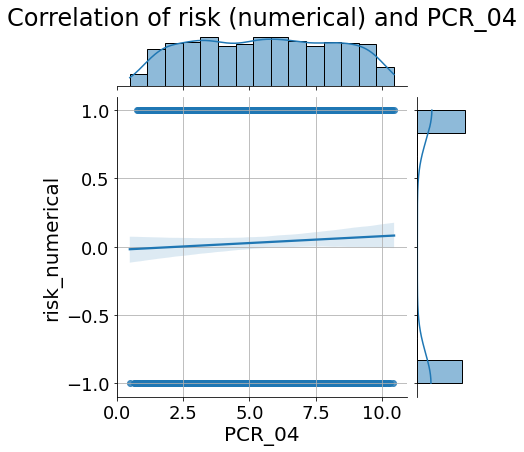

In [13]:
feature = 'PCR_04'
#plt.grid(alpha=0.5)
x = train[feature]
y = train.risk_numerical
# Compute correlation
print("Correlation is: {:.3f}".format(train.corr().risk_numerical[feature]))
g = sns.jointplot(train[feature], train.risk_numerical, kind="reg")
_ = g.ax_joint.grid()
g.fig.suptitle(f'Correlation of risk (numerical) and {feature}',y=1.04)

Correlation is: -0.022


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.04, 'Correlation of risk (numerical) and PCR_08')

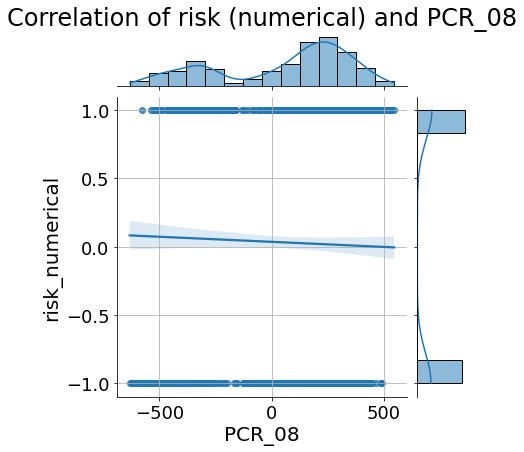

In [14]:
feature = 'PCR_08'
#plt.grid(alpha=0.5)
x = train[feature]
y = train.risk_numerical
# Compute correlation
print("Correlation is: {:.3f}".format(train.corr().risk_numerical[feature]))
g = sns.jointplot(train[feature], train.risk_numerical, kind="reg")
_ = g.ax_joint.grid()
g.fig.suptitle(f'Correlation of risk (numerical) and {feature}',y=1.04)

Correlation is: 0.093


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.04, 'Correlation of risk (numerical) and PCR_10')

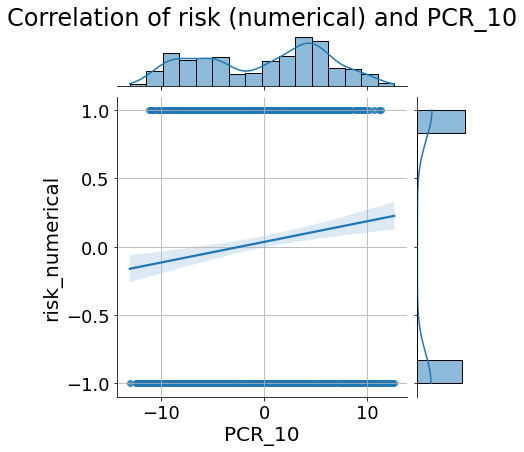

In [15]:
feature = 'PCR_10'
# plt.grid(alpha=0.5)
x = train[feature]
y = train.risk_numerical
# Compute correlation
print("Correlation is: {:.3f}".format(train.corr().risk_numerical[feature]))
g = sns.jointplot(train[feature], train.risk_numerical, kind="reg")
_ = g.ax_joint.grid()
g.fig.suptitle(f'Correlation of risk (numerical) and {feature}',y=1.04)

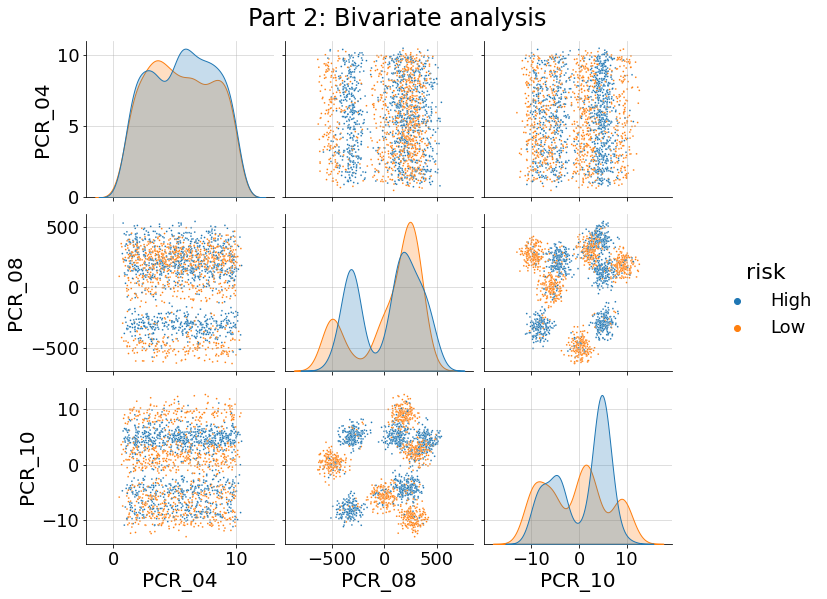

In [16]:
# (Q7)
def draw_pairplot(features, hue, title="", df=None, plot_kws={"s": 3}):
  if df is None:
    df = train
  # The function draws pairplot of two features
  g=sns.pairplot(df, vars=features, hue=hue, plot_kws=plot_kws)
  g.fig.suptitle(title, y=1.04)
  for ax in np.ravel(g.axes):
    ax.grid(alpha=0.5)
  g.fig.set_size_inches(12,8)
draw_pairplot(['PCR_04', 'PCR_08', 'PCR_10'], hue="risk", title="Part 2: Bivariate analysis")

## k-NN implementation

In [17]:
# kNN implementation
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.spatial.distance import cdist
class kNN(BaseEstimator, ClassifierMixin):

  def __init__(self, n_neighbors:int = 5):
    self.n_neighbors = n_neighbors

  def fit(self, X, y):
    self.X = X
    self.y = y
    return self

  def predict(self, X):
    # Compute the predicted labels (+1 or -1)
    distance = cdist(X, self.X)
    k = self.n_neighbors
    closest_k = np.argpartition(distance, k, axis=1)[:,:k]
    Y = np.ones([X.shape[0], 1]) * np.copy(self.y)
    tmp_res = Y[np.arange(Y.shape[0])[:,None], closest_k]
    predictions = np.sign(tmp_res.sum(axis=1))
    return predictions

In [18]:
def visualize_clf(clf, X, Y, title, marker_size=150,
                  grid_length=300, x_label="x", y_label="y"):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["+", "*"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())
    #plot_step = 0.02

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip([-1, 1], palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

In [19]:
partial = train[['PCR_08', 'PCR_10']].copy().to_numpy()

The training accuracy of the model with k=1 is 1.0


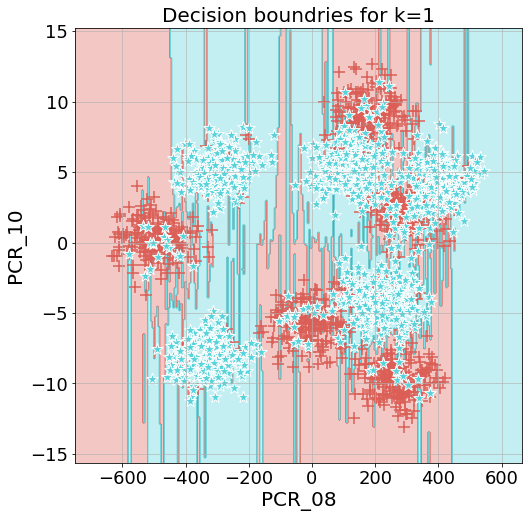

In [20]:
k=1
h = kNN(1)
h.fit(partial, train.risk_numerical)
print(f'The training accuracy of the model with k={k} is {h.score(partial, train.risk_numerical)}')
X = train.loc[:, ['PCR_08', 'PCR_10']].to_numpy()
y = train.loc[:, ['risk_numerical']].to_numpy()
visualize_clf(h, X, y, "Decision boundries for k=1", x_label="PCR_08", y_label="PCR_10")

The training accuracy of the model with k=9 is 0.834


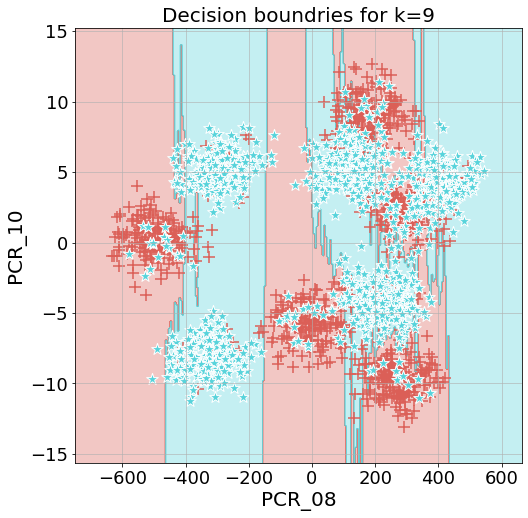

In [21]:
k=9
h = kNN(9)
h.fit(partial, train.risk_numerical)
print(f'The training accuracy of the model with k={k} is {h.score(partial, train.risk_numerical)}')
X = train.loc[:, ['PCR_08', 'PCR_10']].to_numpy()
y = train.loc[:, ['risk_numerical']].to_numpy()
visualize_clf(h, X, y, "Decision boundries for k=9", x_label="PCR_08", y_label="PCR_10")

# Data Normalization


In [22]:
# (Q9)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(partial)

The training accuracy of the model with k=9 is 0.8715


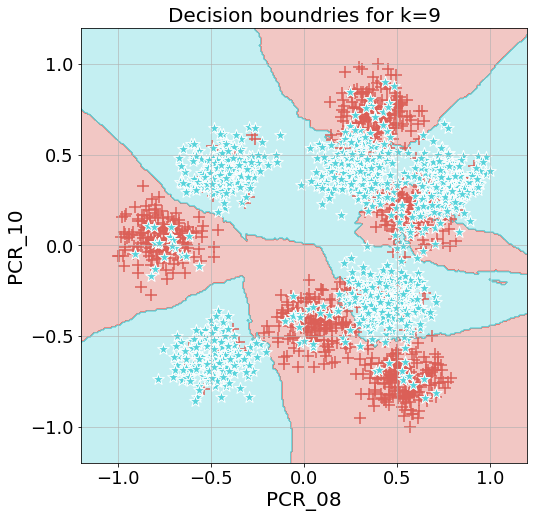

In [23]:
k=9
h = kNN(9)
h.fit(scaled_data, train.risk_numerical)
y = train.loc[:, ['risk_numerical']].to_numpy()
print(f'The training accuracy of the model with k={k} is {h.score(scaled_data, train.risk_numerical)}')
visualize_clf(h, scaled_data, y, "Decision boundries for k=9", x_label="PCR_08", y_label="PCR_10")

# Part 3: Data Exploration


In [24]:
# (Q11)
# Note that we perform the actuall change later in this notebook (In Q13)
pd.get_dummies(data=train, columns=["blood_type"])

patient_id   age  sex  weight  \
921         1726  33.0    F    55.9   
2438        7309  40.0    F    73.7   
2457        5704   8.0    F    41.9   
1124        3822  26.0    M   113.8   
1219          57  28.0    M    53.7   
...          ...   ...  ...     ...   
1393        4126   3.0    M    34.7   
2409        4683  24.0    F    48.1   
864         4412  36.0  NaN    77.7   
808         6090   3.0    M    23.8   
2284        6345  28.0    F    71.0   

                                                address  \
921                          USCGC Mclean\nFPO AA 61590   
2438        7888 Katherine Bridge\nSylviastad, SC 30447   
2457       44718 Michael Squares\nNew Heather, HI 51592   
1124  97186 Melanie Lodge Apt. 376\nLake Philipberg,...   
1219                         USS Faulkner\nFPO AP 36758   
...                                                 ...   
1393  0832 Conley Avenue Suite 092\nPort Bernardstad...   
2409  367 Matthew Harbor Apt. 835\nBillyburgh, IL 83131   
864   18001 Holmes Creek Apt. 253\nNorth Victoria, M...   
808       75734 Bryan Causeway\nNorth Stephen, MD 25076   
2284           634 Mark Tunnel\nGutierrezview, UT 01224   

                current_location  num_of_siblings  happiness_score  \
921    ('10.22677', '-67.33122')              0.0              7.0   
2438                         NaN              2.0              7.0   
2457    ('58.63667', '59.80222')              1.0              9.0   
1124                         NaN              2.0              8.0   
1219    ('17.30858', '97.01124')              2.0              8.0   
...                          ...              ...              ...   
1393   ('-2.90055', '-79.00453')              0.0              6.0   
2409   ('-8.99167', '125.21972')              1.0              7.0   
864    ('45.16024', '-93.08883')              1.0              7.0   
808   ('33.03699', '-117.29198')              1.0              8.0   
2284     ('41.15612', '1.10687')              3.0              6.0   

      household_income  conversations_per_day  sugar_levels  sport_activity  \
921             343.30                    5.0           NaN             1.0   
2438             32.40                    2.0          99.0             0.0   
2457            486.60                    5.0         108.0             0.0   
1124            384.30                    6.0         134.0             0.0   
1219            618.12                    0.0          84.0             0.0   
...                ...                    ...           ...             ...   
1393            613.30                    0.0         105.0             1.0   
2409            427.20                    4.0          90.0             3.0   
864                NaN                    3.0          98.0             2.0   
808             857.00                    3.0          99.0             NaN   
2284            361.80                    0.0          98.0             0.0   

               symptoms  pcr_date    PCR_01    PCR_02  PCR_03    PCR_04  \
921                 NaN  11-01-20 -0.407078  0.199847     2.0  6.329813   
2438       low_appetite  25-01-20  0.783992 -0.484507     3.0  8.902844   
2457                NaN  29-06-20 -0.299679       NaN     3.0  9.618255   
1124                NaN  12-04-20 -0.445683 -0.418327     3.0  4.356374   
1219                NaN  17-02-20 -1.004175  0.041484     5.0  6.844278   
...                 ...       ...       ...       ...     ...       ...   
1393        sore_throat  17-02-20 -1.074682 -0.504752     3.0  5.660199   
2409                NaN  16-08-20  0.948588       NaN     3.0  6.360762   
864         sore_throat  13-06-21 -0.269487  0.997967     1.0  9.073691   
808   sore_throat;fever  19-08-20 -0.458059 -0.831631     1.0  8.331655   
2284                NaN  05-07-20 -0.244723 -0.397685     1.0  6.810790   

          PCR_05      PCR_06     PCR_07      PCR_08     PCR_09     PCR_10  \
921   250.108621  147.442692        NaN  423.763542  -8.4313

In [25]:
# (Q12)
for symptom in ["cough", "low_appetite", "sore_throat", "fever", "shortness_of_breath"]:
  train[symptom] = train.symptoms.str.contains(symptom).map({True:1, False:-1, np.nan:-1})
train.drop(['symptoms'], axis=1, inplace=True)
train.head()

patient_id   age sex  weight blood_type  \
921         1726  33.0   F    55.9         O+   
2438        7309  40.0   F    73.7         B+   
2457        5704   8.0   F    41.9         B+   
1124        3822  26.0   M   113.8         O+   
1219          57  28.0   M    53.7         A+   

                                                address  \
921                          USCGC Mclean\nFPO AA 61590   
2438        7888 Katherine Bridge\nSylviastad, SC 30447   
2457       44718 Michael Squares\nNew Heather, HI 51592   
1124  97186 Melanie Lodge Apt. 376\nLake Philipberg,...   
1219                         USS Faulkner\nFPO AP 36758   

               current_location  num_of_siblings  happiness_score  \
921   ('10.22677', '-67.33122')              0.0              7.0   
2438                        NaN              2.0              7.0   
2457   ('58.63667', '59.80222')              1.0              9.0   
1124                        NaN              2.0              8.0   
1219   ('17.30858', '97.01124')              2.0              8.0   

      household_income  conversations_per_day  sugar_levels  sport_activity  \
921             343.30                    5.0           NaN             1.0   
2438             32.40                    2.0          99.0             0.0   
2457            486.60                    5.0         108.0             0.0   
1124            384.30                    6.0         134.0             0.0   
1219            618.12                    0.0          84.0             0.0   

      pcr_date    PCR_01    PCR_02  PCR_03    PCR_04      PCR_05      PCR_06  \
921   11-01-20 -0.407078  0.199847     2.0  6.329813  250.108621  147.442692   
2438  25-01-20  0.783992 -0.484507     3.0  8.902844   10.267538  280.711775   
2457  29-06-20 -0.299679       NaN     3.0  9.618255  286.775040  180.205426   
1124  12-04-20 -0.445683 -0.418327     3.0  4.356374  253.868820  241.333952   
1219  17-02-20 -1.004175  0.041484     5.0  6.844278  232.976326  304.182053   

         PCR_07      PCR_08     PCR_09    PCR_10  risk spread  covid  \
921         NaN  423.763542  -8.431349  3.682026  High    Low  False   
2438 -17.485533  141.848669 -22.091340  5.276248  High   High   True   
2457  -1.375180  169.511608 -15.573490  9.418958   Low   High   True   
1124  -4.920634  462.771913  -0.342635  3.491480  High   High  False   
1219   0.446967  401.743685 -10.121844  2.724149  High    Low   True   

      risk_numerical  cough  low_appetite  sore_throat  fever  \
921              1.0     -1            -1           -1     -1   
2438             1.0     -1             1           -1     -1   
2457            -1.0     -1            -1           -1     -1   
1124             1.0     -1            -1           -1     -1   
1219             1.0     -1            -1           -1     -1   

      shortness_of_breath  
921                    -1  
2438                   -1  
2457                   -1  
1124                   -1  
1219                   -1

In [26]:
# This is for later use (when  we explore the data in Q27)
train_copy = train.copy()

In [27]:
# (Q13)
# additional data extraction
# current location
train[["x_coord", "y_coord"]] = train.current_location.str.split("'", expand=True)[[1,3]].astype(np.float64)
# The first digit of the zipcode represents a certain group of U.S. states (which we called a region)
train['region'] = train.address.apply(lambda x: np.nan if pd.isna(x) else x.split(" ")[-1][0]).astype("category")
# pcr_date
train[['year', 'month']] = train.pcr_date.str.split("-", expand=True)[[2,1]].astype(np.float64)

In [28]:
train.drop(['current_location','address', 'pcr_date'], axis=1, inplace=True)

In [29]:
# Imputations of categorical features (that we wish to perform before OHE)
random_cols = ["blood_type", "region"]

def random_sample_imputation(data, col):
  train.loc[train[col].isna(), col] = train[col].dropna().sample(train[col].isna().sum(), random_state=29).tolist()
  
for col in random_cols:
  random_sample_imputation(train, col)

In [30]:
# convert to OHE (categorical) or binary
### we concat the OHE instead of replacing for better looking plots :) (later on we drop the redundent columns)
train = pd.concat([train, pd.get_dummies(data=train[['blood_type', 'region']])], axis=1) 
train["sex"] = train.sex.map({'F':1, 'M':-1,np.nan:np.nan})
train.head()

patient_id   age  sex  weight blood_type  num_of_siblings  \
921         1726  33.0  1.0    55.9         O+              0.0   
2438        7309  40.0  1.0    73.7         B+              2.0   
2457        5704   8.0  1.0    41.9         B+              1.0   
1124        3822  26.0 -1.0   113.8         O+              2.0   
1219          57  28.0 -1.0    53.7         A+              2.0   

      happiness_score  household_income  conversations_per_day  sugar_levels  \
921               7.0            343.30                    5.0           NaN   
2438              7.0             32.40                    2.0          99.0   
2457              9.0            486.60                    5.0         108.0   
1124              8.0            384.30                    6.0         134.0   
1219              8.0            618.12                    0.0          84.0   

      sport_activity    PCR_01    PCR_02  PCR_03    PCR_04      PCR_05  \
921              1.0 -0.407078  0.199847     2.0  6.329813  250.108621   
2438             0.0  0.783992 -0.484507     3.0  8.902844   10.267538   
2457             0.0 -0.299679       NaN     3.0  9.618255  286.775040   
1124             0.0 -0.445683 -0.418327     3.0  4.356374  253.868820   
1219             0.0 -1.004175  0.041484     5.0  6.844278  232.976326   

          PCR_06     PCR_07      PCR_08     PCR_09    PCR_10  risk spread  \
921   147.442692        NaN  423.763542  -8.431349  3.682026  High    Low   
2438  280.711775 -17.485533  141.848669 -22.091340  5.276248  High   High   
2457  180.205426  -1.375180  169.511608 -15.573490  9.418958   Low   High   
1124  241.333952  -4.920634  462.771913  -0.342635  3.491480  High   High   
1219  304.182053   0.446967  401.743685 -10.121844  2.724149  High    Low   

      covid  risk_numerical  cough  low_appetite  sore_throat  fever  \
921   False             1.0     -1            -1           -1     -1   
2438   True             1.0     -1             1           -1     -1   
2457   True            -1.0     -1            -1           -1     -1   
1124  False             1.0     -1            -1           -1     -1   
1219   True             1.0     -1            -1           -1     -1   

      shortness_of_breath   x_coord   y_coord region  year  month  \
921                    -1  10.22677 -67.33122      6  20.0    1.0   
2438                   -1       NaN       NaN      3  20.0    1.0   
2457                   -1  58.63667  59.80222      5  20.0    6.0   
1124                   -1       NaN       NaN      2  20.0    4.0   
1219                   -1  17.30858  97.01124      3  20.0    2.0   

      blood_type_A+  blood_type_A-  blood_type_AB+  blood_type_AB-  \
921               0              0               0               0   
2438              0              0               0               0   
2457              0              0               0               0   
1124              0              0               0               0   
1219              1              0               0               0   

      blood_type_B+  blood_type_B-  blood_type_O+  blood_type_O-  region_0  \
921               0              0              1              0         0   
2438              1              0              0              0         0   
2457              1              0              0              0         0   
1124              0              0              1              0         0   
1219              0              0              0              0         0   

      region_1  region_2  region_3  region_4  region_5  region_6  region_7  \
921          0         0         0         0         0         1         0   
2438         0         0         1         0         0         0         0   
2457         0         0         0         0         1         0         0   
1124         0         1         0         0         0         0         0   
1219         0         0         1         0         0         0         0   

      r

In [31]:
# (Q14)
COL_NAME = ['age', 'sex', 'weight', 'blood_type', 'num_of_siblings', 'happiness_score',
            'household_income', 'conversations_per_day', 'sugar_levels',
            'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
            'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
            'cough', 'low_appetite', 'sore_throat', 'fever', 'shortness_of_breath',
            'x_coord', 'y_coord', 'year', 'month', 'region']
KDE_FEATURES = ['age', 'weight', 'num_of_siblings', 'happiness_score',
            'household_income', 'conversations_per_day', 'sugar_levels',
            'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
            'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
            'x_coord', 'y_coord', 'year',  'month']
COLS = 2
ROWS = len(COL_NAME)

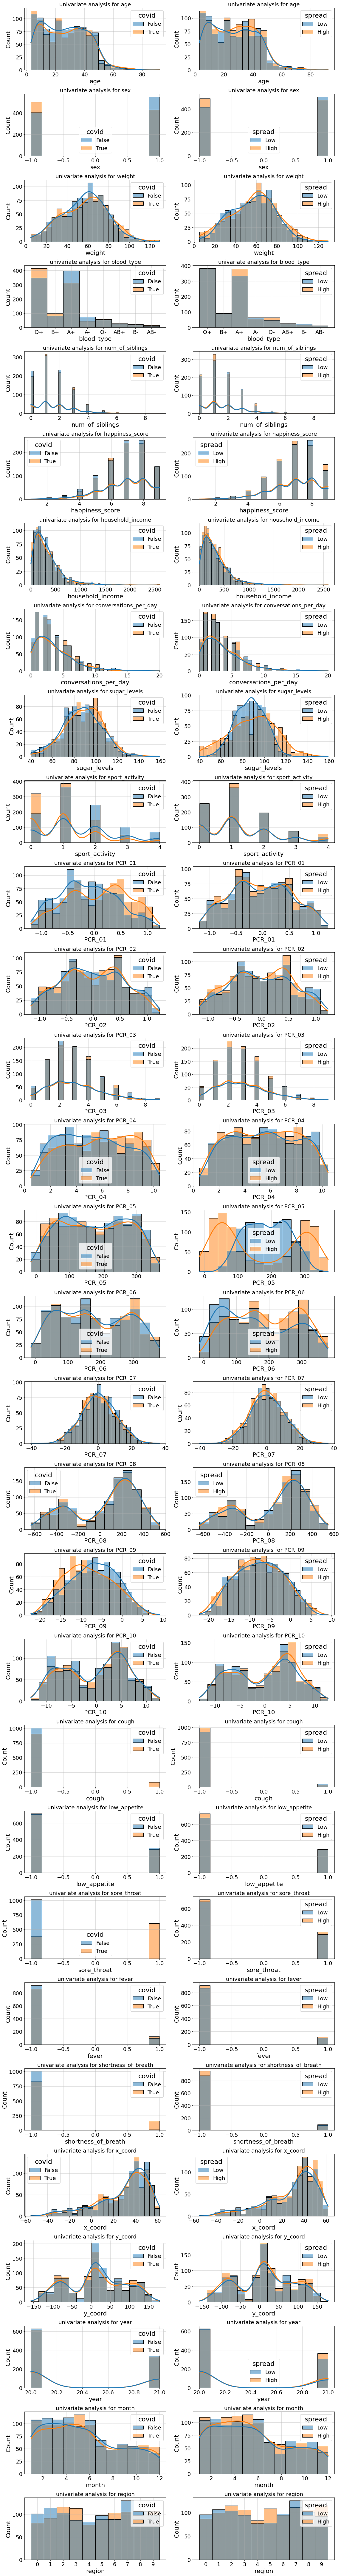

In [32]:
# (Q14 - continue)
plt.figure(figsize=(8 * COLS, 4 * ROWS))

for row in range(ROWS):
  column = COL_NAME[row]
  ax = plt.subplot(ROWS,COLS, row * COLS + 1)
  ax.set_title("univariate analysis for " + column, fontsize=18)
  if column == "month":
    sns.histplot(data=train, x=column, hue="covid", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES), bins=12)
  elif column == "region":
    sns.histplot(data=train, x=column, hue="covid", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES), bins=10)
  else:
    sns.histplot(data=train, x=column, hue="covid", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES))
  plt.grid(alpha=0.5)
  #plt.xticks(rotation=45)
  plt.subplot(ROWS,COLS, row * COLS + 2)
  if column == "month":
    ax2 = sns.histplot(data=train, x=column, hue="spread", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES), bins=12)
  elif column == "region":
    ax2 = sns.histplot(data=train, x=column, hue="spread", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES), bins=10)
  else:
    ax2 = sns.histplot(data=train, x=column, hue="spread", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES))
  ax2.set_title("univariate analysis for " + column, fontsize=18)
  plt.grid(alpha=0.5)
  #plt.xticks(rotation=45)
plt.tight_layout()


In [33]:
# (Q15)
train["spread_numerical"] = train.spread.map({'High':1, 'Low':-1, np.nan:np.nan})
s = train.corr().spread_numerical.abs()
s.sort_values(kind="quicksort", ascending=False).head(11)

spread_numerical       1.000000
PCR_06                 0.135714
PCR_05                 0.113222
sugar_levels           0.057766
sex                    0.054079
x_coord                0.047676
cough                  0.047446
year                   0.046031
region_5               0.044585
PCR_10                 0.037096
shortness_of_breath    0.035181
Name: spread_numerical, dtype: float64

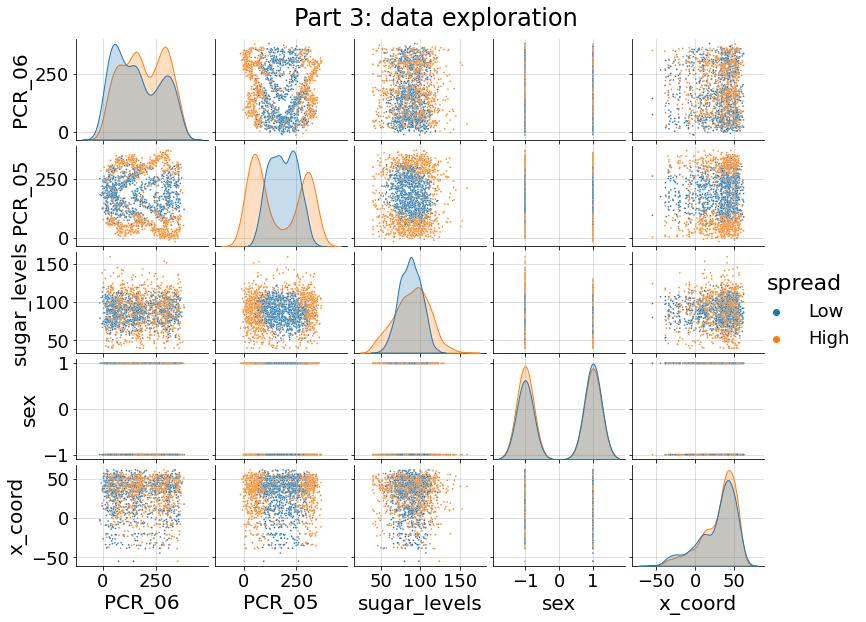

In [34]:
# (Q16)
# Get names of 5 features with best correlation to spread
top_features = list(s.sort_values(kind="quicksort", ascending=False)[1:6].index)
# draw pairplot for each two of these features
draw_pairplot(top_features, hue="spread", title="Part 3: data exploration")

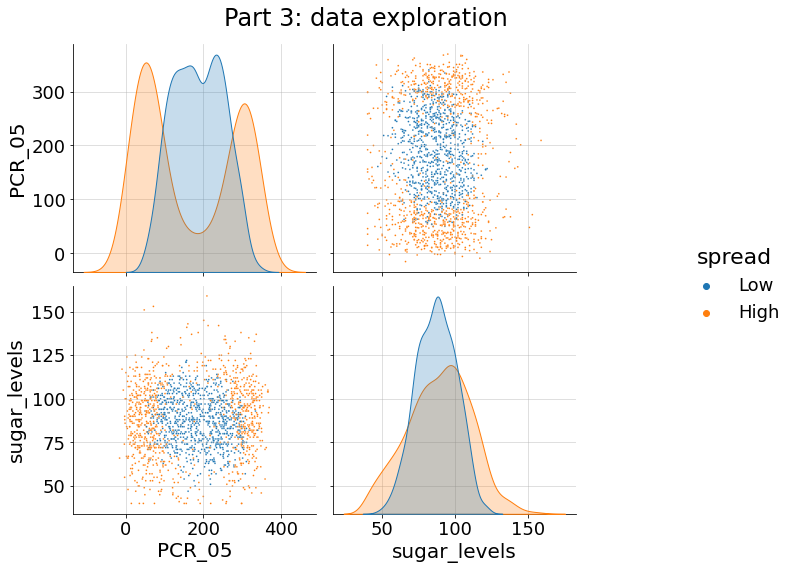

In [35]:
# (Q16)
# Draw the 2 best features only
draw_pairplot(["PCR_05", "sugar_levels"], hue="spread", title="Part 3: data exploration")

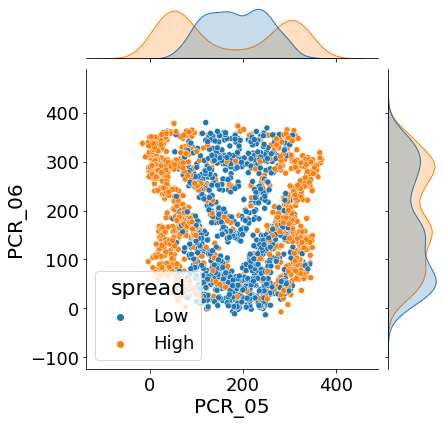

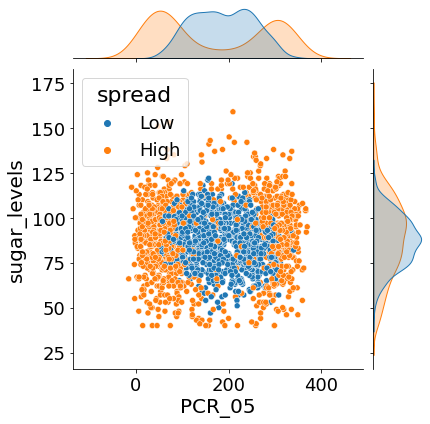

In [36]:
sns.jointplot(data=train, x="PCR_05", y="PCR_06", hue="spread")

sns.jointplot(data=train, x="PCR_05", y="sugar_levels", hue="spread")

# Part 4: Preparing Data

## Missing data

In [37]:
# (Q20)
# Here are some checks we made to decide which imputation to use.
# The imputation itself happens in Q21
train.happiness_score.count()

1905

In [38]:
train.happiness_score.describe()

count    1905.000000
mean        6.956430
std         1.474465
min         1.000000
25%         6.000000
50%         7.000000
75%         8.000000
max         9.000000
Name: happiness_score, dtype: float64

In [39]:
train.happiness_score.value_counts()

7.0    490
8.0    490
6.0    342
9.0    276
5.0    191
4.0     76
3.0     28
2.0     11
1.0      1
Name: happiness_score, dtype: int64

Text(0, 0.5, 'counts')

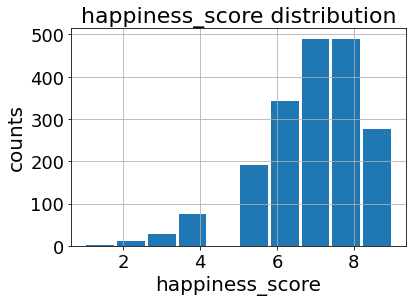

In [40]:
train.happiness_score.hist(rwidth=0.9)
plt.title("happiness_score distribution")
plt.xlabel("happiness_score")
plt.ylabel("counts")

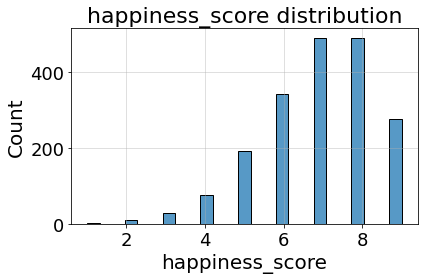

In [41]:
column = "happiness_score"
plt.title("happiness_score distribution")
sns.histplot(data=train, x=column)
plt.grid(alpha=0.5)
plt.tight_layout()

In [42]:
s = train.corr().happiness_score.abs()
s.sort_values(kind="quicksort", ascending=False).head(15)

happiness_score     1.000000
region_3            0.047584
household_income    0.036603
blood_type_O-       0.033750
sport_activity      0.032748
risk_numerical      0.029839
sex                 0.029200
sore_throat         0.028901
fever               0.027476
blood_type_O+       0.024916
blood_type_A-       0.024744
region_8            0.024082
PCR_07              0.023854
covid               0.023259
weight              0.022139
Name: happiness_score, dtype: float64

In [43]:
train[train.happiness_score.isna()].describe()

patient_id        age        sex      weight  num_of_siblings  \
count    95.000000  87.000000  93.000000   93.000000        93.000000   
mean   3523.852632  27.068966   0.096774   58.902151         1.623656   
std    2181.477822  14.765448   1.000701   20.599641         1.276152   
min      12.000000   5.000000  -1.000000    5.000000         0.000000   
25%    1821.500000  15.000000  -1.000000   48.300000         1.000000   
50%    3464.000000  25.000000   1.000000   61.000000         2.000000   
75%    5140.000000  38.500000   1.000000   71.900000         2.000000   
max    7997.000000  64.000000   1.000000  107.800000         6.000000   

       happiness_score  household_income  conversations_per_day  sugar_levels  \
count              0.0         89.000000              89.000000     91.000000   
mean               NaN        255.493483               3.460674     90.043956   
std                NaN        212.417594               2.808494     18.441446   
min                NaN         13.800000               0.000000     45.000000   
25%                NaN        107.900000               1.000000     79.000000   
50%                NaN        195.200000               3.000000     89.000000   
75%                NaN        322.800000               4.000000    101.000000   
max                NaN       1014.080000              11.000000    142.000000   

       sport_activity     PCR_01     PCR_02     PCR_03     PCR_04      PCR_05  \
count       85.000000  89.000000  91.000000  90.000000  95.000000   89.000000   
mean         1.129412  -0.006109  -0.083708   2.900000   5.110288  163.628147   
std          1.203054   0.562569   0.549232   1.586814   2.633722  100.677128   
min          0.000000  -1.108680  -1.140292   0.000000   1.034244   -3.161119   
25%          0.000000  -0.469843  -0.506210   2.000000   2.928670   69.032126   
50%          1.000000  -0.004173  -0.139298   3.000000   4.684735  155.770595   
75%          2.000000   0.386777   0.423074   4.000000   7.611026  257.063855   
max          4.000000   1.115371   0.957342   7.000000  10.460432  369.575055   

           PCR_06     PCR_07      PCR_08     PCR_09     PCR_10  \
count   90.000000  91.000000   95.000000  93.000000  95.000000   
mean   173.754414   1.126656   43.532319  -7.067710   0.406398   
std    108.273840  11.170226  310.095216   6.109510   6.353136   
min     -1.247750 -22.761216 -569.991132 -19.039111 -10.782908   
25%     77.970758  -6.159845 -300.884695 -12.168704  -5.184035   
50%    153.716721  -0.407522  180.740033  -6.836607   1.794293   
75%    274.411842   9.875645  278.987478  -1.766822   5.260082   
max    361.601226  28.724620  493.873552   5.558259  11.754723   

       risk_numerical      cough  low_appetite  sore_throat      fever  \
count       95.000000  95.000000     95.000000    95.000000  95.000000   
mean         0.010526  -0.873684     -0.368421    -0.473684  -0.705263   
std          1.005249   0.489074      0.934591     0.885367   0.712707   
min         -1.000000  -1.000000     -1.000000    -1.000000  -1.000000   
25%         -1.000000  -1.000000     -1.000000    -1.000000  -1.000000   
50%          1.000000  -1.000000     -1.000000    -1.000000  -1.000000   
75%          1.000000  -1.000000      1.000000     1.000000  -1.000000   
max          1.000000   1.000000      1.000000     1.000000   1.000000   

       shortness_of_breath    x_coord     y_coord       year      month  \
count            95.000000  92.000000   92.000000  92.000000  92.000000   
mean             -0.831579  30.064187    7.965496  20.369565   5.119565   
std               0.558353  24.659825   71.099122   0.485332   3.389844   
min              -1.000000 -54.800000 -122.404330  20.000000   1.000000   
25%              -1.000000  15.204470  -55.478893  20.000000   2.000000   
50%              -1.000000  38.418945    8.541315  20.000000   5.000000   
75%              -1.000000  50.067548   43.434645  21.000000   7.000000   
max               1.000000  

In [44]:
train[~train.happiness_score.isna()].describe()

patient_id          age          sex       weight  num_of_siblings  \
count  1905.000000  1809.000000  1791.000000  1790.000000      1799.000000   
mean   4030.119160    26.592593     0.037409    56.910112         1.529739   
std    2309.105511    15.323660     0.999579    22.063928         1.261247   
min       4.000000     3.000000    -1.000000     5.000000         0.000000   
25%    2039.000000    13.000000    -1.000000    40.600000         1.000000   
50%    4051.000000    27.000000     1.000000    58.900000         1.000000   
75%    5985.000000    40.000000     1.000000    72.300000         2.000000   
max    8000.000000    92.000000     1.000000   129.300000         9.000000   

       happiness_score  household_income  conversations_per_day  sugar_levels  \
count      1905.000000       1813.000000             1823.00000   1807.000000   
mean          6.956430        316.860210                3.49808     87.965689   
std           1.474465        265.281025                2.88603     18.301612   
min           1.000000          1.000000                0.00000     40.000000   
25%           6.000000        127.600000                1.00000     76.000000   
50%           7.000000        254.400000                3.00000     88.000000   
75%           8.000000        426.700000                5.00000    100.000000   
max           9.000000       2593.560000               20.00000    159.000000   

       sport_activity       PCR_01       PCR_02       PCR_03       PCR_04  \
count     1814.000000  1811.000000  1817.000000  1825.000000  1905.000000   
mean         1.252481    -0.028840    -0.008040     2.966027     5.564639   
std          1.081960     0.564281     0.572063     1.765268     2.602824   
min          0.000000    -1.187518    -1.161531     0.000000     0.483812   
25%          0.000000    -0.451340    -0.443392     2.000000     3.350778   
50%          1.000000    -0.042252    -0.020180     3.000000     5.583113   
75%          2.000000     0.416090     0.440066     4.000000     7.768545   
max          4.000000     1.225437     1.231782     9.000000    10.378235   

            PCR_05       PCR_06       PCR_07       PCR_08       PCR_09  \
count  1807.000000  1815.000000  1810.000000  1905.000000  1822.000000   
mean    175.823379   177.496765     0.193473    46.304597    -7.596874   
std      99.140088   104.615481    10.218149   296.274861     5.868735   
min     -15.421751   -13.209828   -40.135782  -631.386211   -22.212634   
25%      88.742294    83.650661    -6.886766  -255.710097   -11.945213   
50%     173.926587   166.249455     0.156877   150.617150    -7.634712   
75%     262.466483   275.830896     7.047860   271.604620    -3.219365   
max     367.707018   379.893012    36.614924   545.623699     9.134072   

            PCR_10  risk_numerical        cough  low_appetite  sore_throat  \
count  1905.000000     1905.000000  1905.000000   1905.000000  1905.000000   
mean     -0.219327        0.033071    -0.914961     -0.419423    -0.387927   
std       6.186674        0.999715     0.403649      0.908029     0.921932   
min     -13.058805       -1.000000    -1.000000     -1.000000    -1.000000   
25%      -5.795142       -1.000000    -1.000000     -1.000000    -1.000000   
50%       1.054862        1.000000    -1.000000     -1.000000    -1.000000   
75%       4.786337        1.000000    -1.000000      1.000000     1.000000   
max      12.658549        1.000000     1.000000      1.000000     1.000000   

             fever  shortness_of_breath      x_coord      y_coord  \
count  1905.000000          1905.000000  1812.000000  1812.000000   
mean     -0.781627            -0.830971    29.197819    13.511603   
std       0.623910             0.556462    22.861504    74.009191   
min      -1.000000            -1.000000   -54.800000  -156.474320   
25%      -1.000000            -1.000000    15.585520   -52.206390   
50%      -1.000000            -1.000000    36.203890    10.180030   
75%      -1.000000          

In [45]:
def plot_corr_matrix(df, title, is_big=False, annot=True, figsize=(15, 20)):
  corr_matrix = np.abs(df.corr()).round(decimals=3)

  mask = np.zeros_like(corr_matrix, dtype=bool)
  mask[np.triu_indices_from(mask)]= True

  if is_big:
    f, ax = plt.subplots(figsize=(20, 25)) 
  else:
    f, ax = plt.subplots(figsize=figsize) 
  heatmap = sns.heatmap(corr_matrix, 
                        mask = mask,
                        square = True,
                        linewidths = .5,
                        cmap = "OrRd",
                        cbar_kws = {'shrink': .6, "ticks" : [0, 0.5, 1]},
                        vmin = 0, 
                        vmax = 1,
                        annot = annot,
                        annot_kws = {"size": 6})
  #add the column names as labels
  ax.set_title(title)
  ax.set_yticklabels(corr_matrix.columns, rotation = 0)
  ax.set_xticklabels(corr_matrix.columns)
  sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

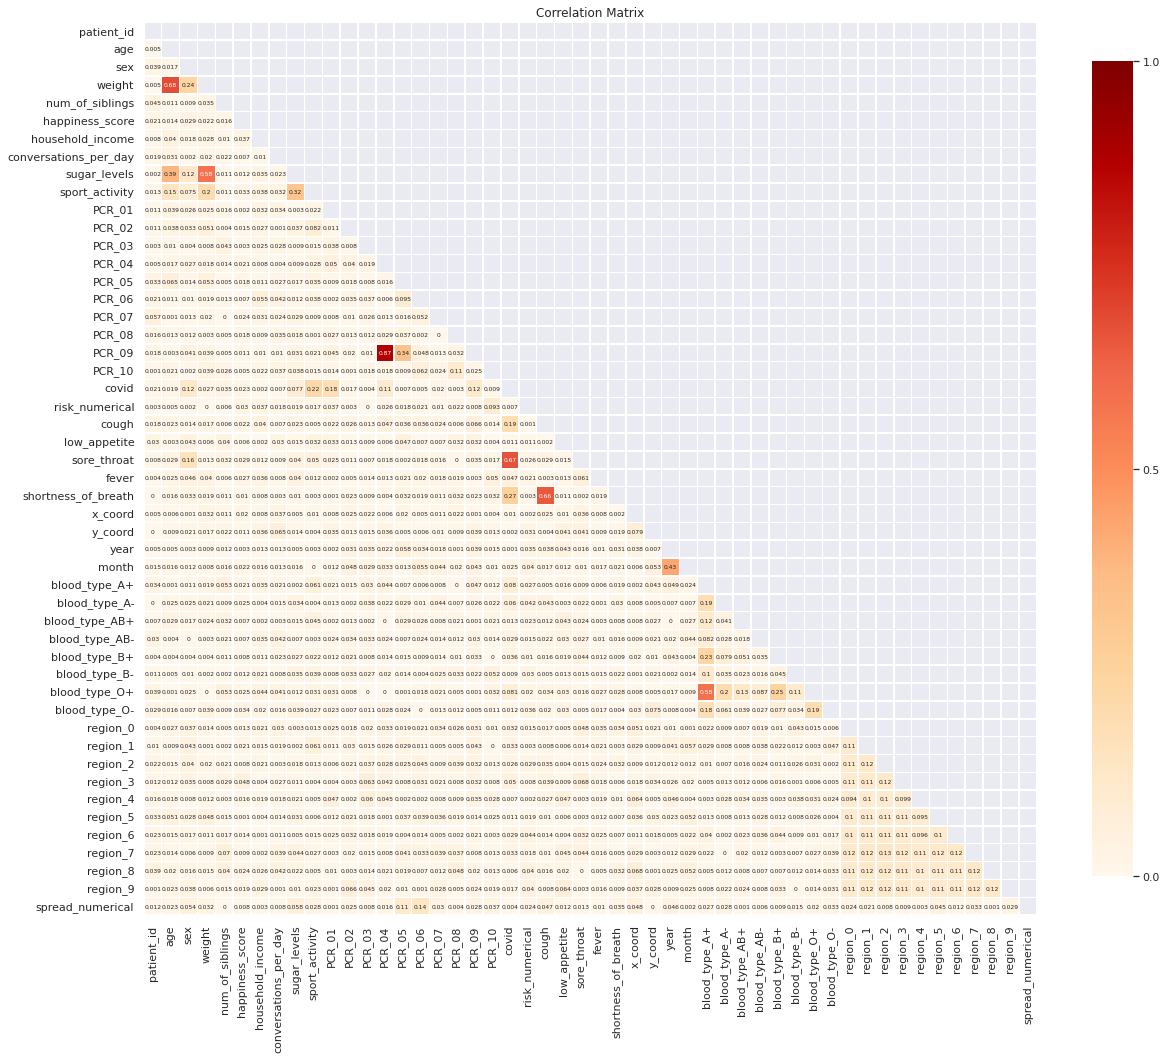

In [46]:
sns.set(font_scale=1)
plot_corr_matrix(train, "Correlation Matrix", is_big=True)

Imputations

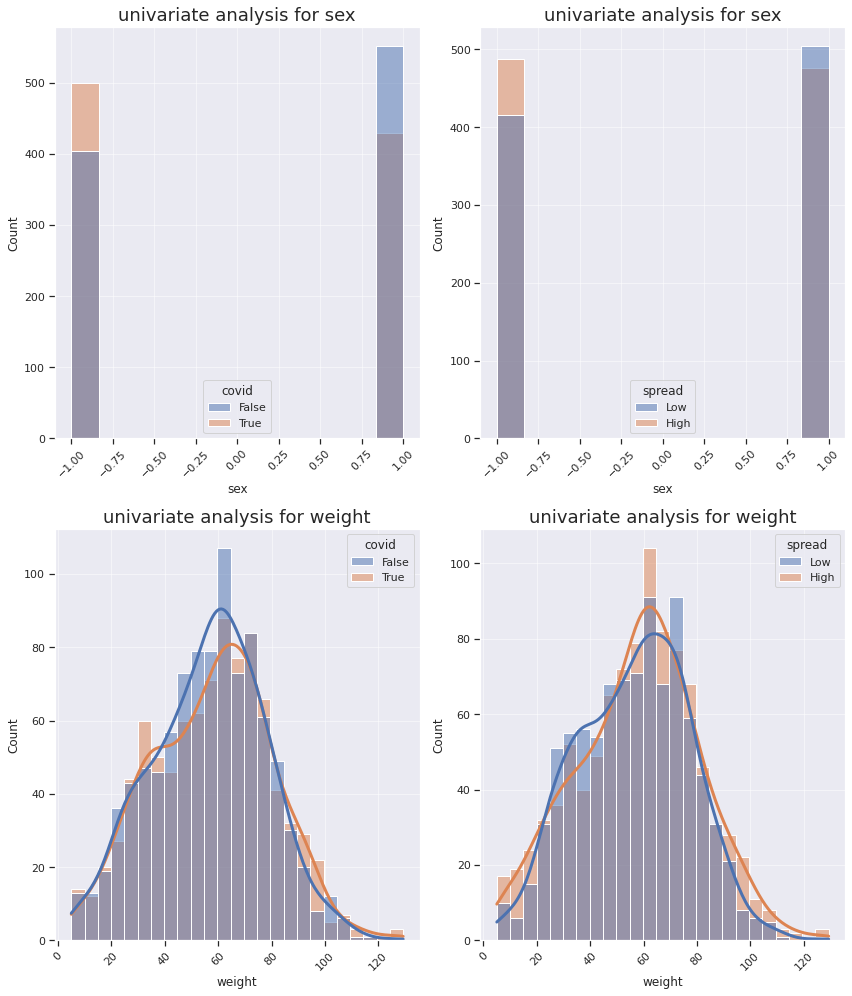

In [47]:
# Q21

# Show univariate analysis after imputation (just for sex, weight)
COL_NAME = ['sex', 'weight']
KDE_FEATURES = ['weight']
COLS = 2
ROWS = len(COL_NAME)

plt.figure(figsize=(6 * COLS, 7 * ROWS))

for row in range(ROWS):
  column = COL_NAME[row]
  ax = plt.subplot(ROWS,COLS, row * COLS + 1)
  ax.set_title("univariate analysis for " + column, fontsize=18)
  sns.histplot(data=train, x=column, hue="covid", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES))
  plt.grid(alpha=0.5)
  plt.xticks(rotation=45)
  plt.subplot(ROWS,COLS, row * COLS + 2)
  ax2 = sns.histplot(data=train, x=column, hue="spread", line_kws={"linewidth": 3},
  kde=(column in KDE_FEATURES))
  ax2.set_title("univariate analysis for " + column, fontsize=18)
  plt.grid(alpha=0.5)
  plt.xticks(rotation=45)
plt.tight_layout()


In [49]:
# (Q21) Imputation type - list of imputations types we chose for each feature + reasons
"""
'age',                   # median according to weight, fill leftovers with random (this should happen before weight impute)
'sex',                   # random sample
'weight',                # median in age group (after age imputation)
'blood_type',            # random sample (more than 5% missing)
'num_of_siblings',       # random sample (more than 5% missing)
'happiness_score',       # median sample (we already did)
'household_income',      # median imputation (dist. is shifted gaussian)
'conversations_per_day', # median imputation (skewed dist.)
'sugar_levels',          # median in correspondance to weight
'sport_activity',        # median in correspondance to sugar_level
'year',                  # random sample
'month',                 # random within the year
'PCR_01',                # median imputation, because: Gaussian dist (also not correlated to other things).
'PCR_02',                # median imputation, because: Gaussian dist (also not correlated to other things).
'PCR_03',                # median imputation, because: Gaussian dist (also not correlated to other things).
'PCR_04'                 # no missing values 
'PCR_05',                # it's correlated to spread, not gaussian. Impute using PCR_09 (because they are correlated).
'PCR_06',                # median, since it's correlated to spread (even though it's not gaussian).
'PCR_07',                # median imputation, because: Gaussian dist (also not correlated to other things).
'PCR_08'                 # no missing values 
'PCR_09',                # Since PCR_04 is full, we'll use median in the relevant bin
'PCR_10'                 # no missing values 
'x_coord', 'y_coord',    # compare to region, by random from samples with the same region (impute after region)
'region'                 # random sample imputation
"""
((2000 - train.count()) / 2000).sort_values(ascending=False).head(10)

weight              0.0585
sex                 0.0580
num_of_siblings     0.0540
age                 0.0520
PCR_05              0.0520
sugar_levels        0.0510
sport_activity      0.0505
PCR_01              0.0500
PCR_07              0.0495
household_income    0.0490
dtype: float64

In [50]:
# Imputations.
# Notice we already perform imputations for sex, blood_type and region (before OHE)

median_cols = ["happiness_score", "household_income", "conversations_per_day",
               "PCR_01", "PCR_02", "PCR_03", "PCR_06", "PCR_07"]
mean_cols = []
most_frequent_cols = []
random_cols = ["sex", "num_of_siblings", "year"]

# Median imputation
train[median_cols] = train[median_cols].fillna(train[median_cols].median())
train[['happiness_score', 'conversations_per_day', 'PCR_03']] = train[['happiness_score', 'conversations_per_day', 'PCR_03']].round()

# Mean imputation
train[mean_cols] = train[mean_cols].fillna(train[mean_cols].mean())
# Most  frequent imputation (we don't actually use it)
# train[most_frequent_cols] = train[most_frequent_cols].fillna(train[most_frequent_cols].mode().loc[0])

def random_sample_imputation(data, col):
  train.loc[train[col].isna(), col] = train[col].dropna().sample(train[col].isna().sum(), random_state=29).tolist()
  
for col in random_cols:
  random_sample_imputation(train, col)

Handling special imputations

In [51]:
def median_imputation_according_to(col_to_impute, according_to_col):
  # Impute col_to_impute using the median  within according_to_col
  train[col_to_impute].fillna(train.groupby(according_to_col)[col_to_impute].transform('median'), inplace=True)

def median_imputation_according_to_bins(col_to_impute, according_to_col, bins_range):
  # Impute col_to_impute using the median within according_to_col, using bins
  train[col_to_impute].fillna(
      train.groupby(pd.cut(train[according_to_col], bins_range))[col_to_impute].transform("median"), inplace=True)

In [52]:
# Handling special imputations

def median_imputation_according_to(col_to_impute, according_to_col):
  # Impute col_to_impute using the median  within according_to_col
  train[col_to_impute].fillna(train.groupby(according_to_col)[col_to_impute].transform('median'), inplace=True)

def median_imputation_according_to_bins(col_to_impute, according_to_col, bins_range):
  # Impute col_to_impute using the median within according_to_col, using bins
  train[col_to_impute].fillna(
      train.groupby(pd.cut(train[according_to_col], bins_range))[col_to_impute].transform("median"), inplace=True)

# Impute age according to median among patients with the same weight
median_imputation_according_to_bins('age', 'weight', bins_range=range(0, 200, 10))
# Since some values of age are still nan (places where both age & weight were nan), fill them with random sample imputation
train['age'] = train['age'].fillna(train['age'].median())

# Impute weight according to age
median_imputation_according_to_bins('weight', 'age', np.arange(0, 130, 5))

# Impute sugar_levels using median in correspondance to weight
median_imputation_according_to_bins('sugar_levels', 'weight', np.arange(0, 150, 5))

# Impute sport_activity using median in correspondance to sugar_level
median_imputation_according_to_bins('sport_activity', 'sugar_levels', np.arange(0, 180, 10))
train['sport_activity'] = train.sport_activity.round() # since sport_activity is ordinal

# Imputation of PCR09 - median according to bins of PCR04
median_imputation_according_to_bins('PCR_09', 'PCR_04', np.arange(0, 15))

# Same for PCR05, with respect to PCR09
median_imputation_according_to_bins('PCR_05', 'PCR_09', np.arange(-30, 30))

def random_imputation_according_to(col_to_impute, according_to_col):
  # impute col_to_impute using random sample within according_to_col
  grouped = train.groupby(according_to_col)
  for name, group in grouped:
    train.loc[(train[according_to_col] == name) & (train[col_to_impute].isna()), col_to_impute] = \
      group[col_to_impute].dropna().sample(group[col_to_impute].isna().sum(), random_state=29).tolist()

random_imputation_according_to("month", "year")
random_imputation_according_to("x_coord", "region")
random_imputation_according_to("y_coord", "region")

In [53]:
# Make sure there aren't any missing values left
(((2000 - train.count()) / 2000) == 0).all()

True

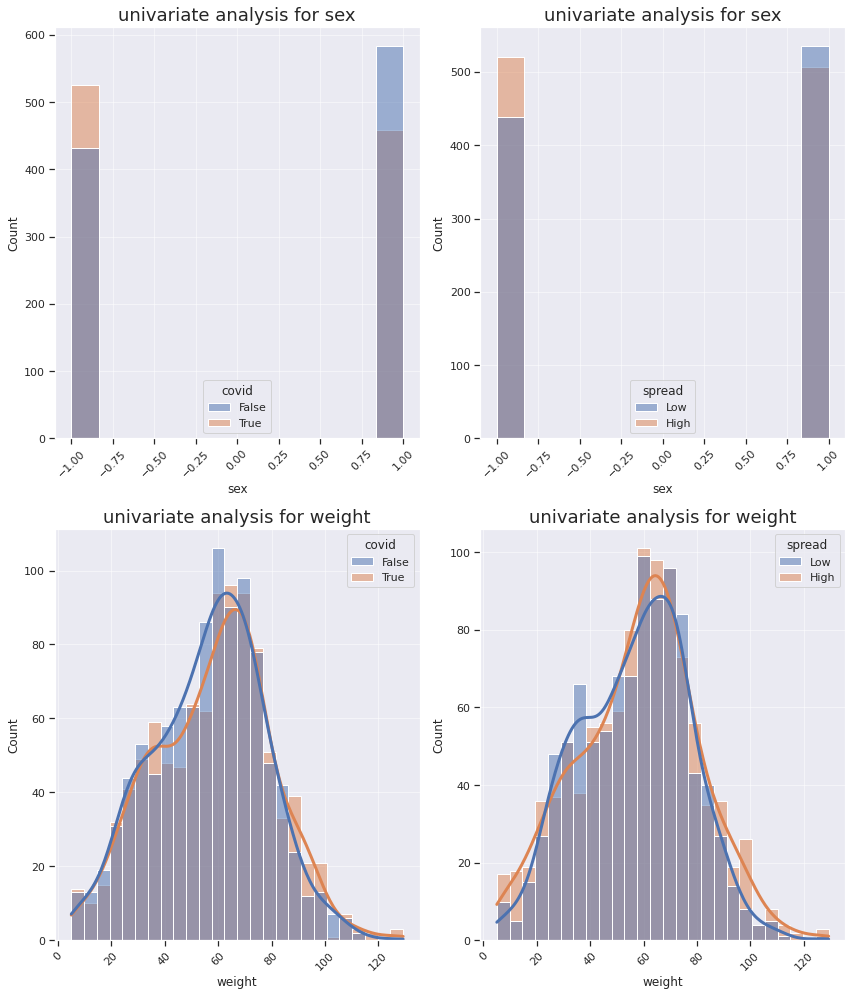

In [54]:
# (Q21 continue) - Show univariate analysis after imputation (just for sex, weight)
COL_NAME = ['sex', 'weight']
KDE_FEATURES = ['weight']
COLS = 2
ROWS = len(COL_NAME)

plt.figure(figsize=(6 * COLS, 7 * ROWS))

for row in range(ROWS):
  column = COL_NAME[row]
  ax = plt.subplot(ROWS,COLS, row * COLS + 1)
  ax.set_title("univariate analysis for " + column, fontsize=18)
  sns.histplot(data=train, x=column, hue="covid", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES))
  plt.grid(alpha=0.5)
  plt.xticks(rotation=45)
  plt.subplot(ROWS,COLS, row * COLS + 2)
  ax2 = sns.histplot(data=train, x=column, hue="spread", line_kws={"linewidth": 3},
  kde=(column in KDE_FEATURES))
  ax2.set_title("univariate analysis for " + column, fontsize=18)
  plt.grid(alpha=0.5)
  plt.xticks(rotation=45)
plt.tight_layout()


## Data Normalization

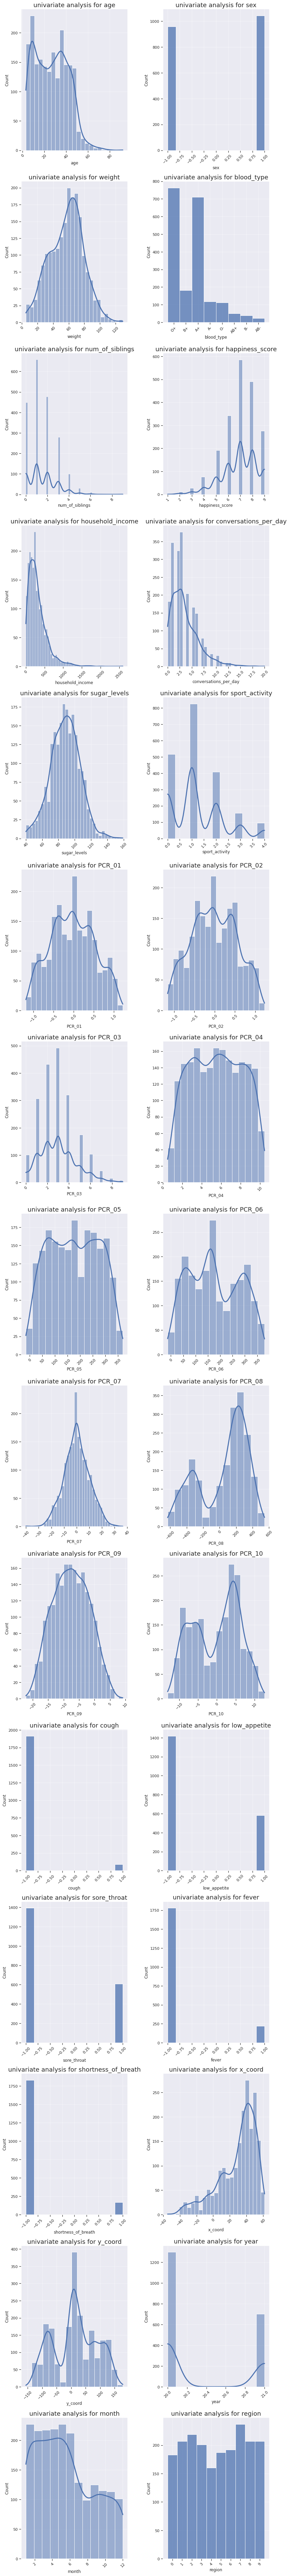

In [55]:
# Plot hists of features (without hue)
# The goal is to look at the different distributions (to decide about normalization method)

COL_NAME = ['age', 'sex', 'weight', 'blood_type', 'num_of_siblings', 'happiness_score',
            'household_income', 'conversations_per_day', 'sugar_levels',
            'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
            'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
            'cough', 'low_appetite', 'sore_throat', 'fever', 'shortness_of_breath',
            'x_coord', 'y_coord', 'year', 'month', 'region']
KDE_FEATURES = ['age', 'weight', 'num_of_siblings', 'happiness_score',
            'household_income', 'conversations_per_day', 'sugar_levels',
            'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
            'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
            'x_coord', 'y_coord', 'year',  'month']
COLS = 2
ROWS = len(COL_NAME)
plt.figure(figsize=(6 * COLS, 7 * ROWS))

for row in range(ROWS):
  column = COL_NAME[row]
  ax = plt.subplot(ROWS,COLS, row + 1)
  ax.set_title("univariate analysis for " + column, fontsize=18)
  if column == "month":
    sns.histplot(data=train, x=column, line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES), bins=12)
  else:
    sns.histplot(data=train, x=column, line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES))
  plt.grid(alpha=0.5)
  plt.xticks(rotation=45)
plt.tight_layout()


In [56]:
# Scaling the features
"""
'age' # Standard (because there are outliers)
'weight' # Standard (Q10, normal dist - therefore minmax  is  bad)
'num_of_siblings' # Standard (because there are outliers)
'happiness_score' # Standard (because there are outliers)
'household_income' # Standard (because there are outliers)
'conversations_per_day', # Standard (because there are outliers)
'sugar_levels', # Standard (Gaussian)
'sport_activity', # MinMaxScaling (ordinal with only 5 categories)
'PCR_01',# MinMaxScaling (almost already scaled)
'PCR_02', # MinMaxScaling (almost already scaled)
'PCR_03', # Standard (outliers)
'PCR_04', # MinMaxScaling (no outliers)
'PCR_05', # MinMaxScaling (no outliers)
'PCR_06', # MinMaxScaling (no outliers)
'PCR_07',# Standard (gaussian dist.)
'PCR_08', # MinMaxScaling (it's not a gaussian & no outliers)
'PCR_09', # Standard (gaussian dist.)
'PCR_10', # MinMaxScaling (it's not a gaussian)
'x_coord', # Standard (there are outliers)
'y_coord', # MinMaxScaling (it's not a gaussian)
'year', # MinMax (there are two categories)
'month', # MinMax 
"""

# From here: everything boolean, we can use MinMax to transfer from [0,1] to [-1,1]
"""
'sex', # already normelized
'cough', 'low_appetite',
'sore_throat', 'fever', 'shortness_of_breath',
'blood_type_A+',
'blood_type_A-', 'blood_type_AB+', 'blood_type_AB-', 'blood_type_B+',
'blood_type_B-', 'blood_type_O+', 'blood_type_O-',
'region_0', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5',
'region_6', 'region_7', 'region_8', 'region_9'
"""

"\n'sex', # already normelized\n'cough', 'low_appetite',\n'sore_throat', 'fever', 'shortness_of_breath',\n'blood_type_A+',\n'blood_type_A-', 'blood_type_AB+', 'blood_type_AB-', 'blood_type_B+',\n'blood_type_B-', 'blood_type_O+', 'blood_type_O-',\n'region_0', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5',\n'region_6', 'region_7', 'region_8', 'region_9'\n"

In [57]:
min_max_features = ['sport_activity', 'PCR_01', 'PCR_02',
                    'PCR_04', 'PCR_05', 'PCR_06', 'PCR_08', 'PCR_10', 'y_coord',
                    'year', 'month', 'sex', 'cough', 'low_appetite',
                    'sore_throat', 'fever', 'shortness_of_breath', 
                    'blood_type_A+', 'blood_type_A-', 'blood_type_AB+',
                    'blood_type_AB-', 'blood_type_B+', 'blood_type_B-',
                    'blood_type_O+', 'blood_type_O-', 'region_0', 'region_1',
                    'region_2', 'region_3', 'region_4', 'region_5', 'region_6',
                    'region_7', 'region_8', 'region_9']
standard_features = ['age', 'weight', 'num_of_siblings',  'happiness_score',
                     'household_income', 'conversations_per_day', 'sugar_levels', 'PCR_03',
                     'PCR_07', 'PCR_09', 'x_coord', ]

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
train[min_max_features] = min_max_scaler.fit_transform(train[min_max_features])

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
train[standard_features] = standard_scaler.fit_transform(train[standard_features])


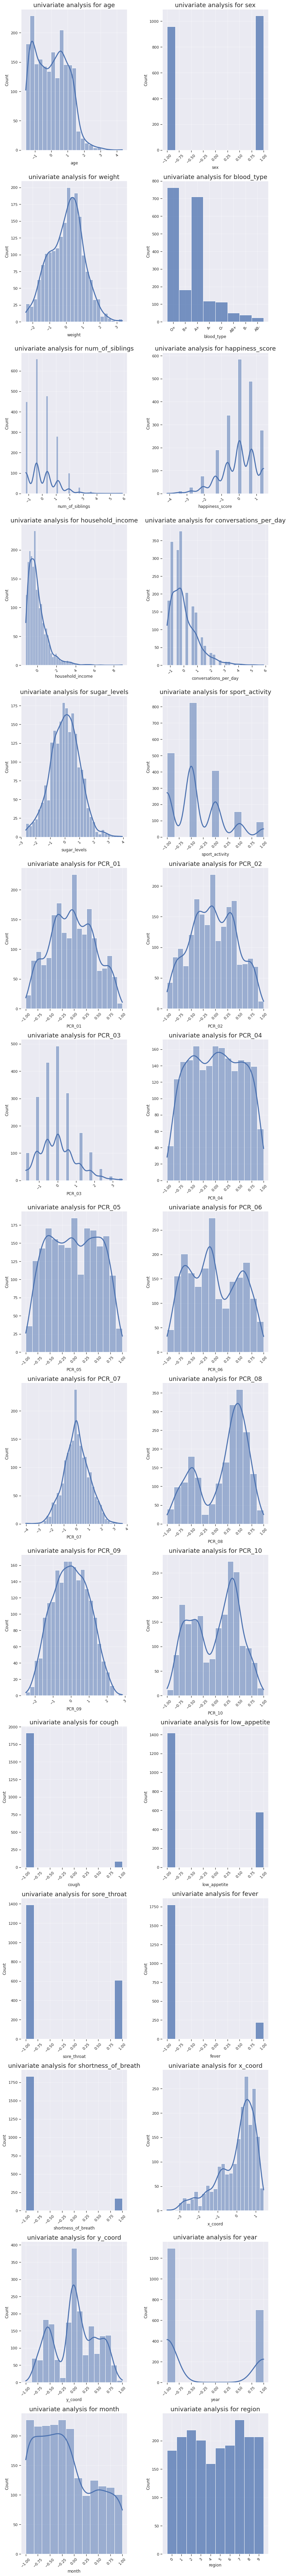

In [58]:
# Plot hists of features after scaling (without hue)

COL_NAME = ['age', 'sex', 'weight', 'blood_type', 'num_of_siblings', 'happiness_score',
            'household_income', 'conversations_per_day', 'sugar_levels',
            'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
            'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
            'cough', 'low_appetite', 'sore_throat', 'fever', 'shortness_of_breath',
            'x_coord', 'y_coord', 'year', 'month', 'region']
KDE_FEATURES = ['age', 'weight', 'num_of_siblings', 'happiness_score',
            'household_income', 'conversations_per_day', 'sugar_levels',
            'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
            'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
            'x_coord', 'y_coord', 'year',  'month']
COLS = 2
ROWS = len(COL_NAME)
plt.figure(figsize=(6 * COLS, 7 * ROWS))

for row in range(ROWS):
  column = COL_NAME[row]
  ax = plt.subplot(ROWS,COLS, row + 1)
  ax.set_title("univariate analysis for " + column, fontsize=18)
  if column == "month":
    sns.histplot(data=train, x=column, line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES), bins=12)
  else:
    sns.histplot(data=train, x=column, line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES))
  plt.grid(alpha=0.5)
  plt.xticks(rotation=45)
plt.tight_layout()

# Part 5:  Feature Selection

## Manual Feature Selection

In [59]:
tmp_df = train[[col for col in train.columns if "PCR" in col]].copy()
tmp_df.corr()

PCR_01    PCR_02    PCR_03    PCR_04    PCR_05    PCR_06    PCR_07  \
PCR_01  1.000000  0.010104  0.035419 -0.048738  0.008467 -0.001837 -0.007223   
PCR_02  0.010104  1.000000 -0.007967 -0.039193 -0.015431 -0.033437  0.009686   
PCR_03  0.035419 -0.007967  1.000000 -0.018470 -0.003488  0.035928 -0.024705   
PCR_04 -0.048738 -0.039193 -0.018470  1.000000 -0.033190  0.005387  0.012429   
PCR_05  0.008467 -0.015431 -0.003488 -0.033190  1.000000 -0.089908 -0.018029   
PCR_06 -0.001837 -0.033437  0.035928  0.005387 -0.089908  1.000000  0.050683   
PCR_07 -0.007223  0.009686 -0.024705  0.012429 -0.018029  0.050683  1.000000   
PCR_08  0.026089 -0.012489  0.011938 -0.028721  0.033267  0.001980  0.000147   
PCR_09  0.034613  0.024181  0.013700 -0.876847  0.339790 -0.041886 -0.020117   
PCR_10 -0.013686  0.000513 -0.017562  0.017665  0.008519  0.059920 -0.023223   

          PCR_08    PCR_09    PCR_10  
PCR_01  0.026089  0.034613 -0.013686  
PCR_02 -0.012489  0.024181  0.000513  
PCR_03  0.011938  0.013700 -0.017562  
PCR_04 -0.028721 -0.876847  0.017665  
PCR_05  0.033267  0.339790  0.008519  
PCR_06  0.001980 -0.041886  0.059920  
PCR_07  0.000147 -0.020117 -0.023223  
PCR_08  1.000000  0.038876  0.111316  
PCR_09  0.038876  1.000000 -0.025344  
PCR_10  0.111316 -0.025344  1.000000

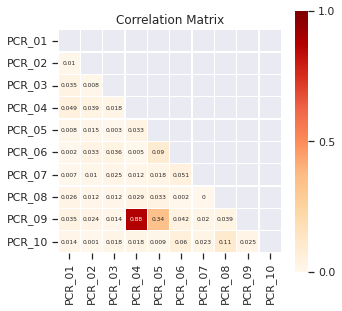

In [60]:
plot_corr_matrix(tmp_df, "Correlation Matrix", figsize=(5,8))

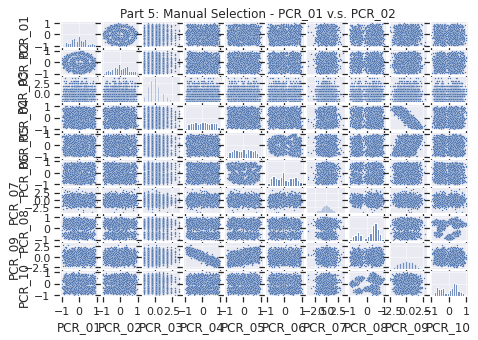

In [61]:
g=sns.pairplot(tmp_df, plot_kws={"s": 2})
g.fig.suptitle("Part 5: Manual Selection - PCR_01 v.s. PCR_02", y=1.04, fontsize=12)
for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)
g.fig.set_size_inches(6,4)


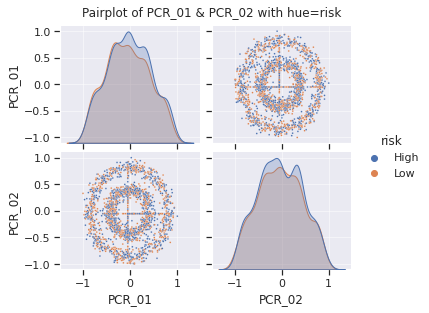

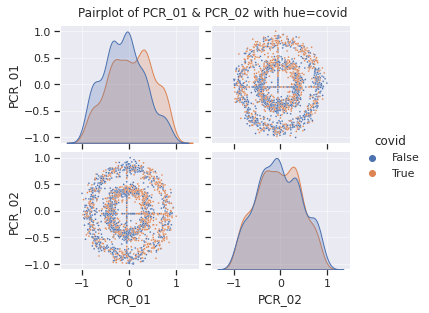

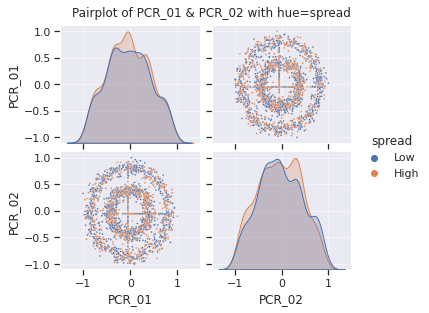

In [62]:
for target in ['risk', 'covid', 'spread']:
  features = ['PCR_01', 'PCR_02']
  hue = target
  title = f"Pairplot of PCR_01 & PCR_02 with hue={target}"
  df = train
  g=sns.pairplot(df, vars=features, hue=hue, plot_kws={"s": 3})
  g.fig.suptitle(title, y=1.04, fontsize=12)
  for ax in np.ravel(g.axes):
    ax.grid(alpha=0.5)
  g.fig.set_size_inches(6,4)

In [63]:
def plot3d(df, colX, colY, colZ, hue=None):
  %matplotlib inline

  fig = plt.figure(figsize=(20, 5))
  axes = [fig.add_subplot(1, 4, 1, projection='3d'),
          fig.add_subplot(1, 4, 2, projection='3d'),
          fig.add_subplot(1, 4, 3, projection='3d'),
          fig.add_subplot(1, 4, 4, projection='3d')]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if hue is None:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=1)
    else:
      idx = df[hue] == True
      df1 = df[idx]
      df2 = df[~idx]

      ax.scatter3D(df1[colX], df1[colY], df1[colZ], color=palette[0], s=1)
      ax.scatter3D(df2[colX], df2[colY], df2[colZ], color=palette[1], s=1)

    ax.set_xlabel(colX)
    ax.set_ylabel(colY)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    
    ax.view_init(elev=5., azim=45*i)
  
  axes[0].set_zlabel("\n" + colZ, linespacing=2.2)

  plt.tight_layout()
  plt.show()

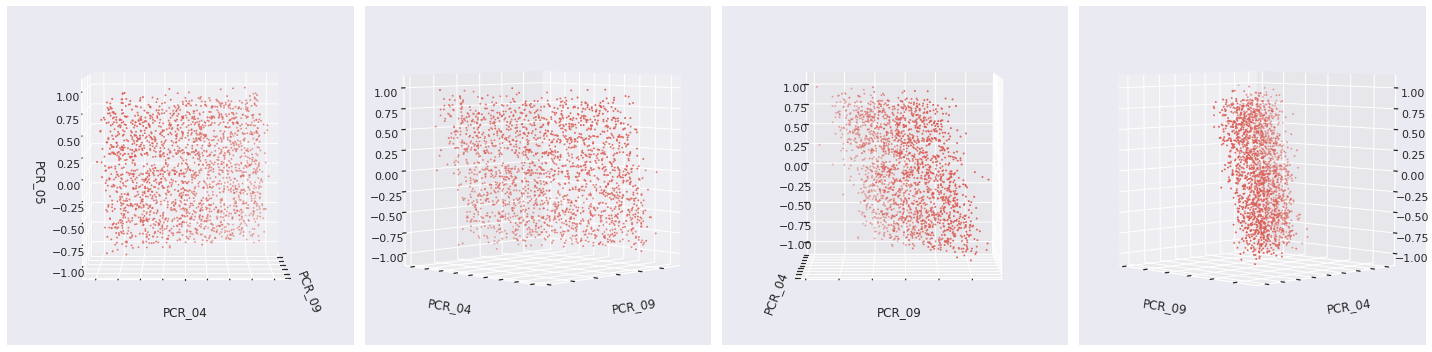

In [64]:
plot3d(tmp_df, 'PCR_09', 'PCR_04', 'PCR_05')

## Automatic Feature Selection

In [65]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
COL_NAME = ['age', 'sex', 'weight', 'blood_type_A+', 'blood_type_A-',
            'blood_type_AB+', 'blood_type_AB-', 'blood_type_B+',
            'blood_type_O+', 'blood_type_O-',
            'num_of_siblings', 'happiness_score',
            'household_income', 'conversations_per_day', 'sugar_levels',
            'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
            'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
            'cough', 'low_appetite', 'sore_throat', 'fever', 'shortness_of_breath',
            'x_coord', 'y_coord', 'year', 'month', 'region_0', 'region_1',
            'region_2', 'region_3', 'region_4', 'region_5', 'region_6',
            'region_7', 'region_8', 'region_9']
X = train[COL_NAME]
y = train["spread"]
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select=2)
sfs.fit(X, y)
indices = sfs.get_support(indices=True)
print("The selected features are: ")
print(COL_NAME[indices[0]], COL_NAME[indices[1]])

The selected features are: 
sugar_levels PCR_05


## Final feature selection

In [66]:
# (Q27) Data research

### We start with univariate analysis

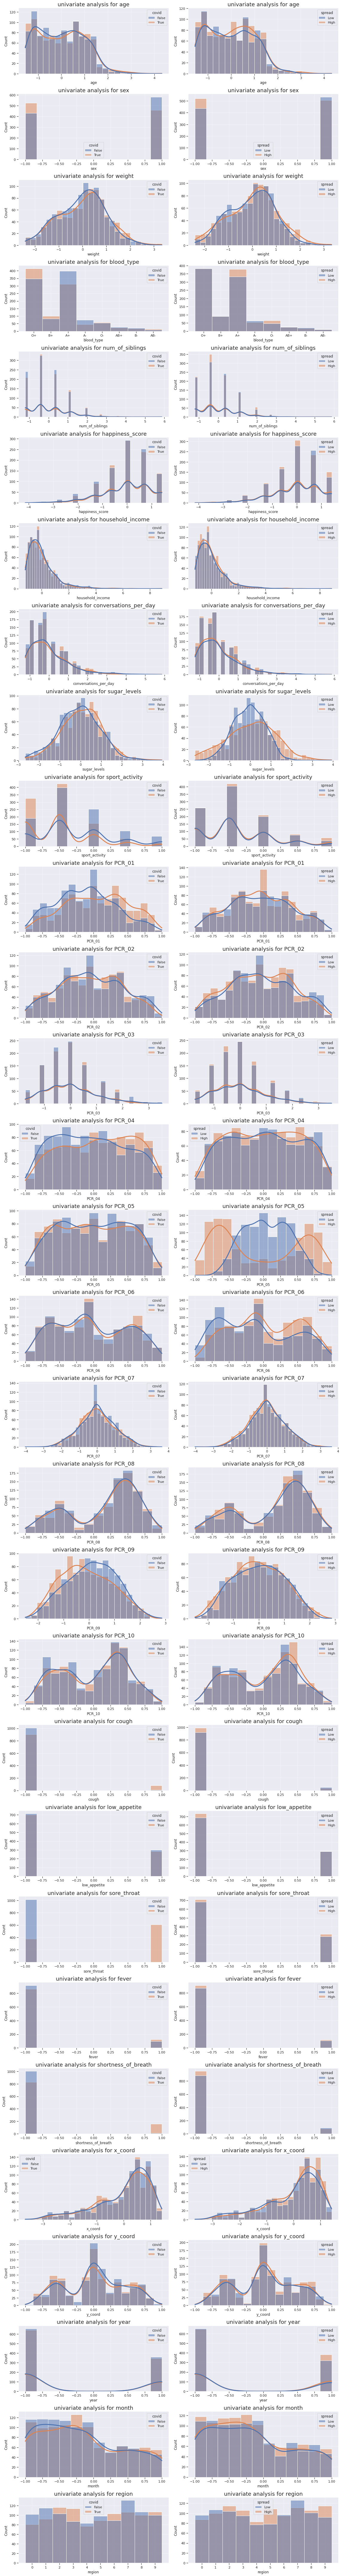

In [67]:
# univariant after normalization & imputation
COL_NAME = ['age', 'sex', 'weight', 'blood_type', 'num_of_siblings', 'happiness_score',
            'household_income', 'conversations_per_day', 'sugar_levels',
            'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
            'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
            'cough', 'low_appetite', 'sore_throat', 'fever', 'shortness_of_breath',
            'x_coord', 'y_coord', 'year', 'month', 'region']
KDE_FEATURES = ['age', 'weight', 'num_of_siblings', 'happiness_score',
            'household_income', 'conversations_per_day', 'sugar_levels',
            'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
            'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
            'x_coord', 'y_coord', 'year',  'month']
COLS = 2
ROWS = len(COL_NAME)
plt.figure(figsize=(8 * COLS, 4 * ROWS))

for row in range(ROWS):
  column = COL_NAME[row]
  ax = plt.subplot(ROWS,COLS, row * COLS + 1)
  ax.set_title("univariate analysis for " + column, fontsize=18)
  if column == "month":
    sns.histplot(data=train, x=column, hue="covid", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES), bins=12)
  elif column == "region":
    sns.histplot(data=train, x=column, hue="covid", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES), bins=10)
  else:
    sns.histplot(data=train, x=column, hue="covid", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES))
  plt.grid(alpha=0.5)
  plt.subplot(ROWS,COLS, row * COLS + 2)
  if column == "month":
    ax2 = sns.histplot(data=train, x=column, hue="spread", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES), bins=12)
  elif column == "region":
    ax2 = sns.histplot(data=train, x=column, hue="spread", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES), bins=10)
  else:
    ax2 = sns.histplot(data=train, x=column, hue="spread", line_kws={"linewidth": 3},
    kde=(column in KDE_FEATURES))
  ax2.set_title("univariate analysis for " + column, fontsize=18)
  plt.grid(alpha=0.5)
plt.tight_layout()

In [68]:
def plot_normsalized_categorical_feature(feature, target, df=None):
  if df is None:
    df = train
  fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,4))
  ax1.grid(alpha=0.5)
  ax2.grid(alpha=0.5)
  ax1.set_title("Absolute", fontsize=22)
  ax2.set_title("Normalized", fontsize=22)
  _ = pd.crosstab(df[feature], df[target]).plot(kind='bar', stacked=True, ax=ax1)
  _ = pd.crosstab(df[feature], df[target], normalize="index").plot(kind='bar', stacked=True, ax=ax2)


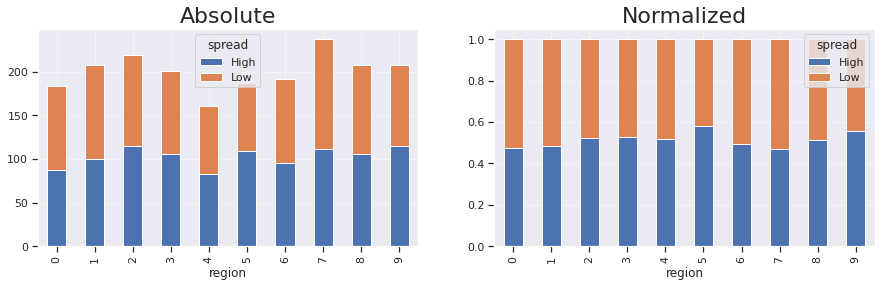

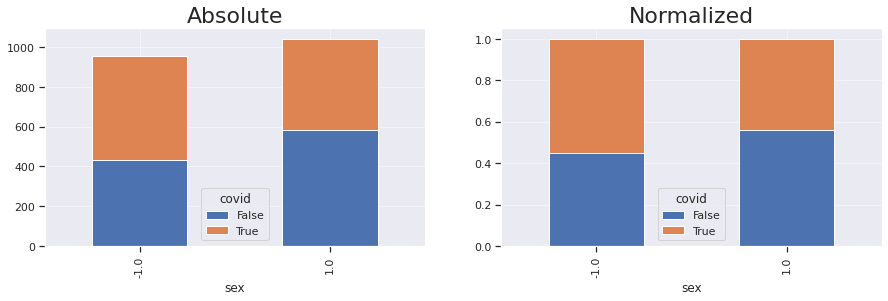

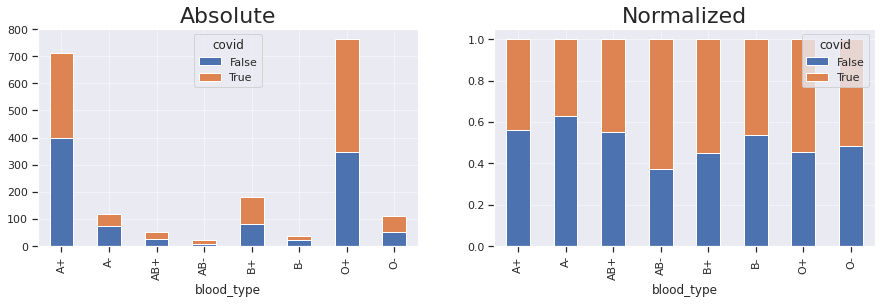

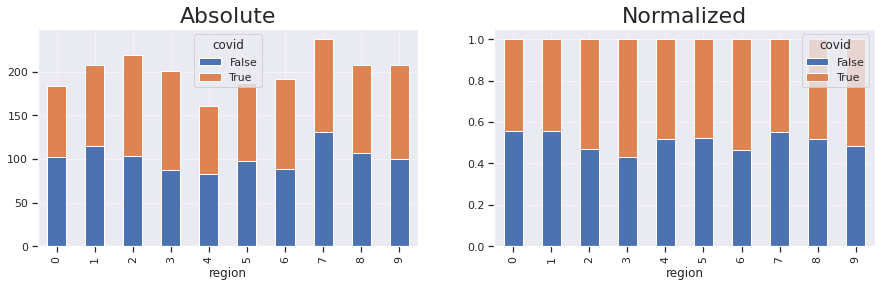

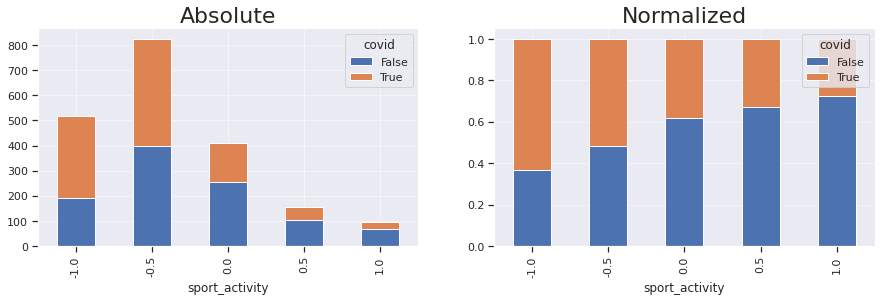

In [69]:
plot_normsalized_categorical_feature('region', 'spread')
plot_normsalized_categorical_feature('sex', 'covid')
plot_normsalized_categorical_feature('blood_type', 'covid')
plot_normsalized_categorical_feature('region', 'covid')
plot_normsalized_categorical_feature('sport_activity', 'covid')

In [70]:
s = train.corr().covid.abs()
s.sort_values(kind="quicksort", ascending=False).head(11)

covid                  1.000000
sore_throat            0.668709
shortness_of_breath    0.268846
sport_activity         0.215466
cough                  0.187062
PCR_01                 0.176768
PCR_09                 0.112423
sex                    0.108478
PCR_04                 0.107340
blood_type_O+          0.080755
blood_type_A+          0.079746
Name: covid, dtype: float64

In [71]:
print(train.shortness_of_breath.value_counts())
print(train.cough.value_counts())
print(train.sore_throat.value_counts())

-1.0    1831
 1.0     169
Name: shortness_of_breath, dtype: int64
-1.0    1913
 1.0      87
Name: cough, dtype: int64
-1.0    1392
 1.0     608
Name: sore_throat, dtype: int64


### Bivariate analysis
Looking at correlations between the variables to themselves, and between pairs of features to the target features

In [72]:
# Get pairs of features with a correlation over a certain threshold
threshold = 0.33
corr_mat = train.corr().abs()
corr_indices = np.where(corr_mat > threshold)
corr_list = [(corr_mat.index[x], corr_mat.columns[y]) for x, y in zip(*corr_indices) if x != y and x < y]
print(corr_list)

[('age', 'weight'), ('age', 'sugar_levels'), ('weight', 'sugar_levels'), ('PCR_04', 'PCR_09'), ('PCR_05', 'PCR_09'), ('covid', 'sore_throat'), ('cough', 'shortness_of_breath'), ('year', 'month'), ('blood_type_A+', 'blood_type_O+')]


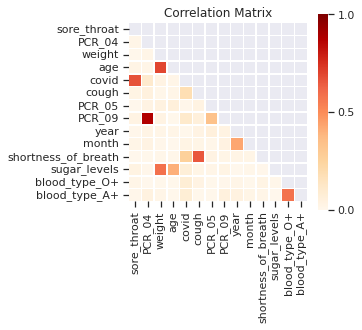

In [73]:
cols_to_plot = list(set([corr_mat.index[x] for x, y in zip(*corr_indices) if x != y] +[corr_mat.index[y] for x, y in zip(*corr_indices) if x != y]))
plot_corr_matrix(train[cols_to_plot], "Correlation Matrix", is_big=False, annot=False, figsize=(4,6))

#### Draw pariplots and 3d plots of related features

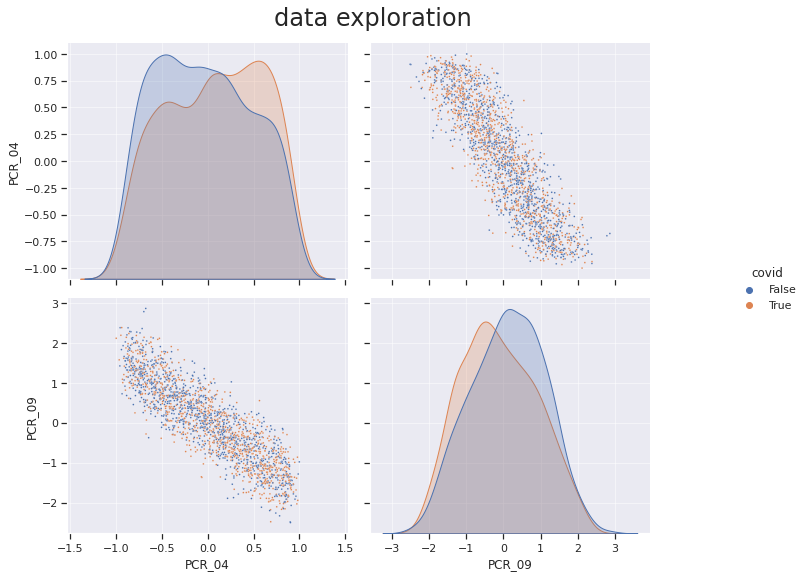

In [74]:
draw_pairplot(["PCR_04", "PCR_09"], hue="covid", title="data exploration")

Exploring the relation between sugar levels, age, weight

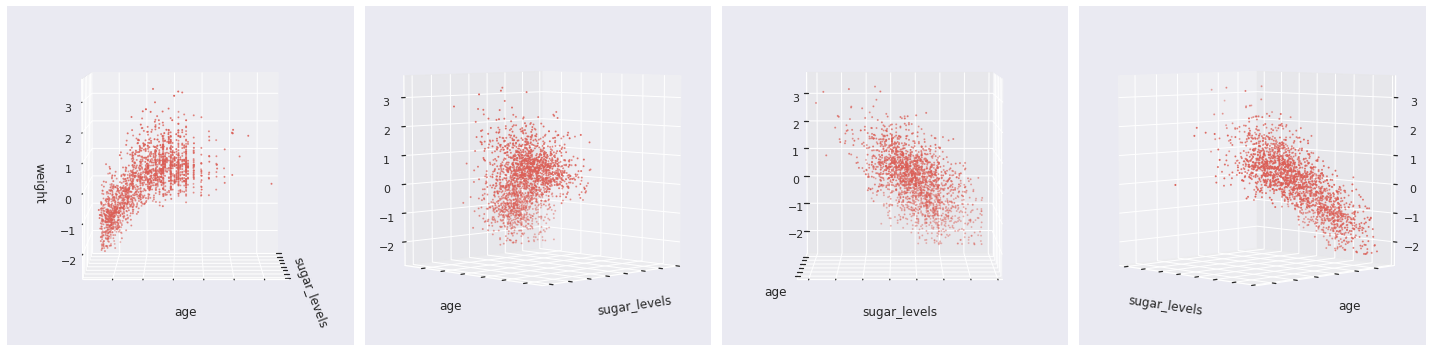

In [75]:
plot3d(train, 'sugar_levels', 'age', 'weight')

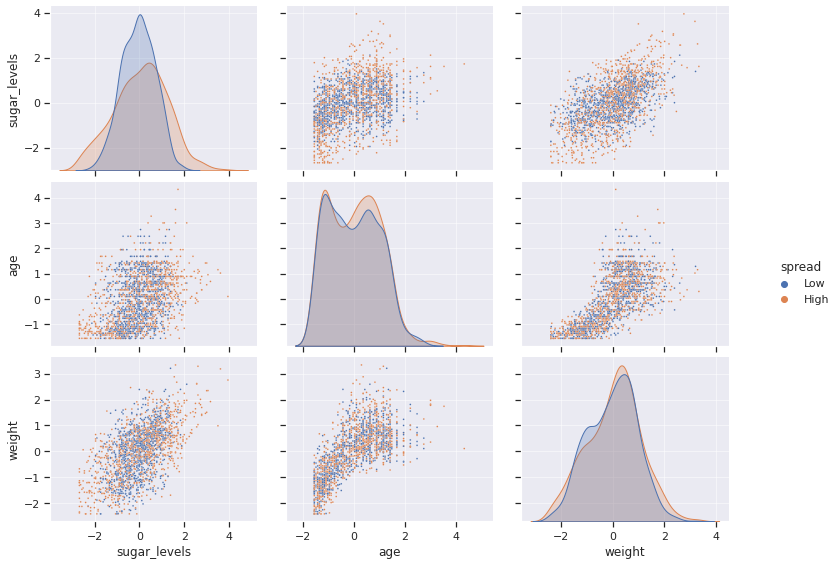

In [76]:
draw_pairplot(['sugar_levels', 'age', 'weight'],  hue="spread", title="")

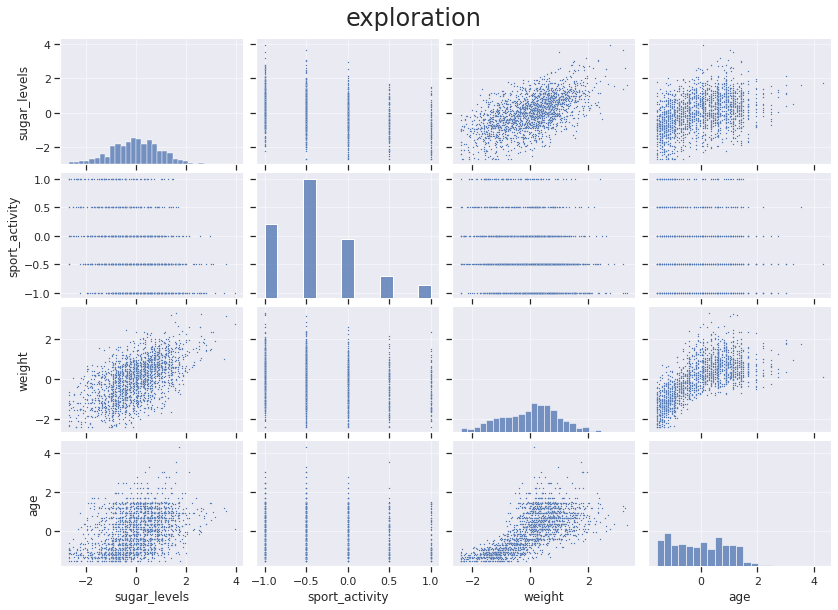

In [77]:
g=sns.pairplot(train[['sugar_levels', 'sport_activity', 'weight',  'age']], plot_kws={"s": 2})
g.fig.suptitle("exploration", y=1.04)
for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

Exploring the relation between cough and shortness of breath

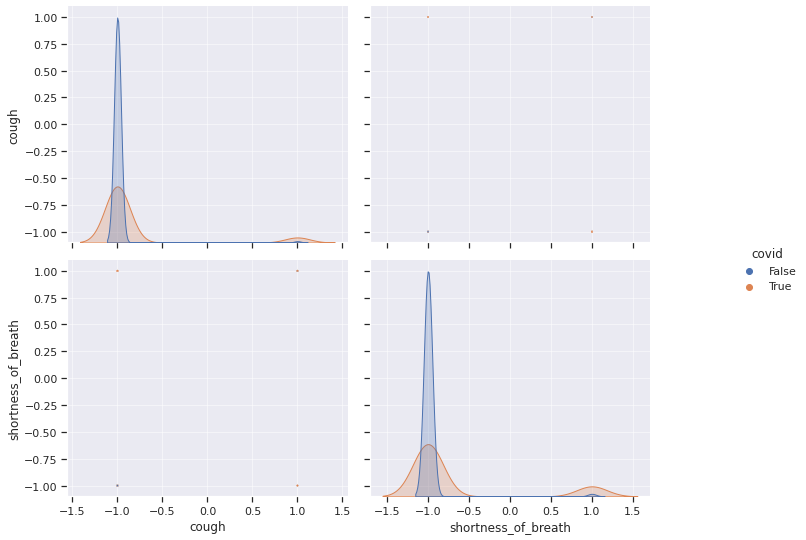

In [78]:
draw_pairplot(features=["cough", "shortness_of_breath"], hue="covid", title="")

In [79]:
train.groupby(["cough"]).shortness_of_breath.value_counts()

cough  shortness_of_breath
-1.0   -1.0                   1826
        1.0                     87
 1.0    1.0                     82
       -1.0                      5
Name: shortness_of_breath, dtype: int64

In [80]:
# Show the percentage of each group
train.groupby(["cough"]).shortness_of_breath.value_counts(normalize=True)

cough  shortness_of_breath
-1.0   -1.0                   0.954522
        1.0                   0.045478
 1.0    1.0                   0.942529
       -1.0                   0.057471
Name: shortness_of_breath, dtype: float64

In [81]:
train.groupby(["cough", "shortness_of_breath"]).covid.value_counts()

cough  shortness_of_breath  covid
-1.0   -1.0                 False    1003
                            True      823
        1.0                 True       81
                            False       6
 1.0   -1.0                 True        4
                            False       1
        1.0                 True       77
                            False       5
Name: covid, dtype: int64

#### Drawing pairplots of feature which are correlated to covid

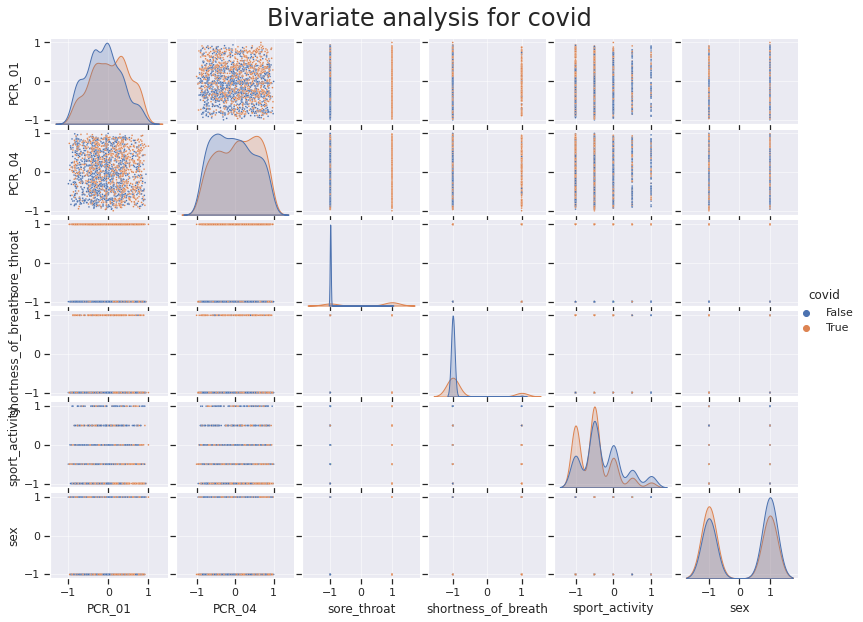

In [82]:
draw_pairplot(["PCR_01", "PCR_04", "sore_throat", "shortness_of_breath", "sport_activity", "sex"],
              hue="covid", title="Bivariate analysis for covid")

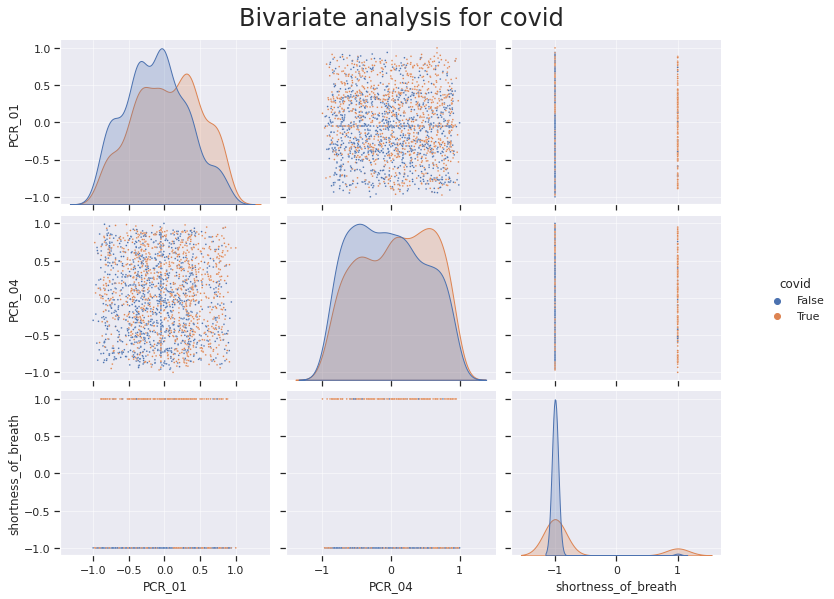

In [83]:
# Drawing again only some of the features from the above plot
draw_pairplot(["PCR_01", "PCR_04", "shortness_of_breath"],
              hue="covid", title="Bivariate analysis for covid")

shortness_of_breath  covid
-1.0                 False    1004
                     True      827
 1.0                 True      158
                     False      11
Name: covid, dtype: int64


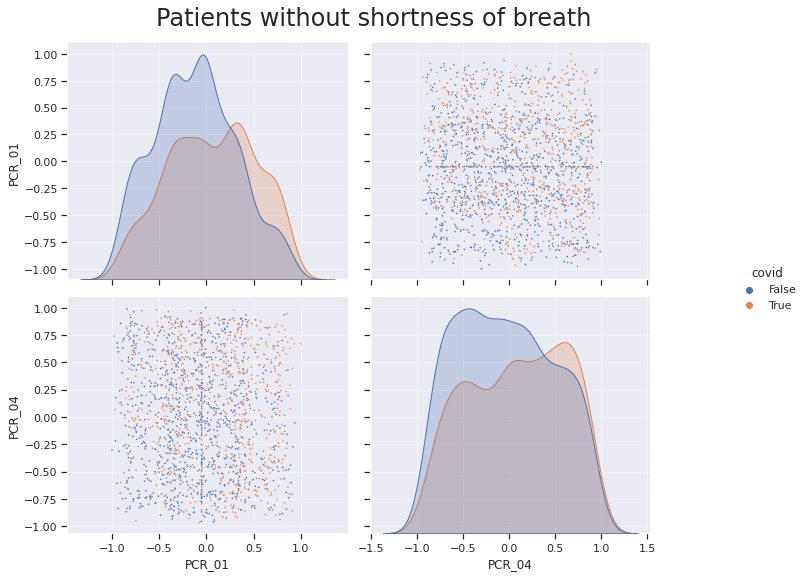

In [84]:
print(train.groupby(["shortness_of_breath"]).covid.value_counts())

# Since a lot of the people with shortness of breath have covid,
# we look only on the people who doesnt experience shortness of breath
draw_pairplot(["PCR_01", "PCR_04",],
              hue="covid", title="Patients without shortness of breath", df=train[train.shortness_of_breath==-1])

sore_throat  covid
-1.0         False    1014
             True      378
 1.0         True      607
             False       1
Name: covid, dtype: int64


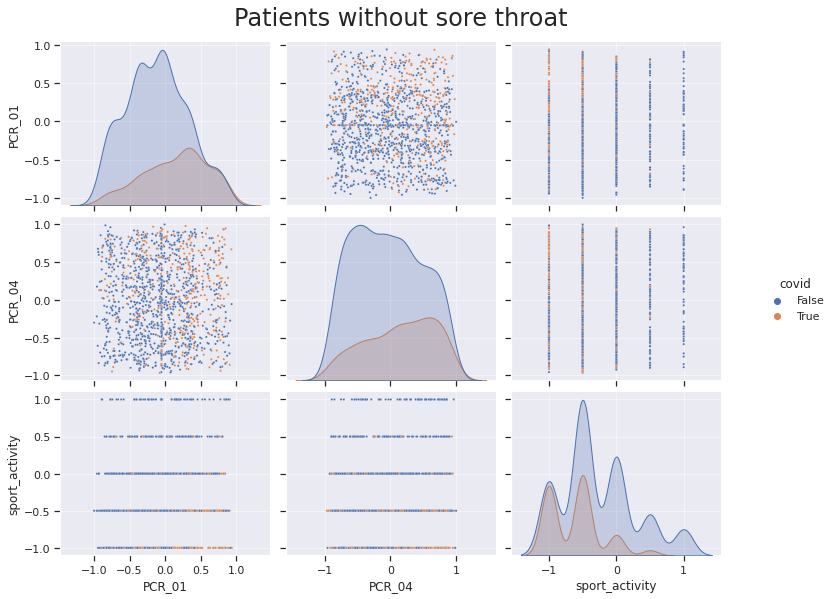

In [85]:
print(train.groupby(["sore_throat"]).covid.value_counts())

# Performing the same thing for sore_throat
draw_pairplot(["PCR_01", "PCR_04", "sport_activity"],
              hue="covid", title="Patients without sore throat", df=train[train.sore_throat==-1], plot_kws={"s": 5})

In [86]:
tmp_df = train[train.sore_throat == -1].copy()
tmp_df.corr().covid.sort_values(ascending=False).head(10)

covid                  1.000000
shortness_of_breath    0.432112
cough                  0.319802
PCR_01                 0.256994
PCR_04                 0.153059
blood_type_O+          0.148953
sugar_levels           0.079296
weight                 0.061385
age                    0.055035
y_coord                0.032763
Name: covid, dtype: float64

#### More bivariate analysis

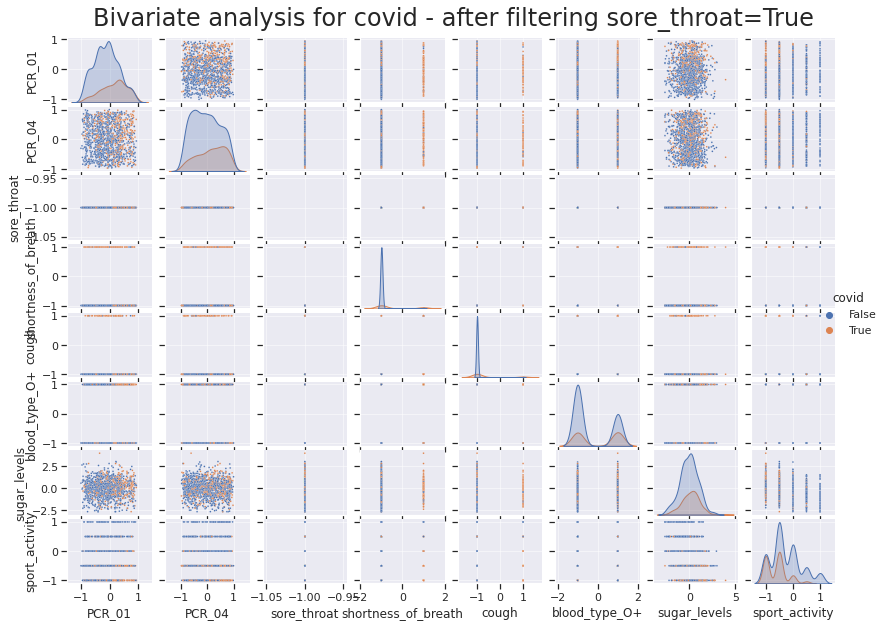

In [87]:
draw_pairplot(["PCR_01", "PCR_04", "sore_throat", "shortness_of_breath", "cough", "blood_type_O+", "sugar_levels", "sport_activity"],
              hue="covid", title="Bivariate analysis for covid - after filtering sore_throat=True", df=tmp_df)

In [88]:
train.groupby(['sore_throat', 'low_appetite']).covid.value_counts()

sore_throat  low_appetite  covid
-1.0         -1.0          False    714
                           True     266
              1.0          False    300
                           True     112
 1.0         -1.0          True     437
              1.0          True     170
                           False      1
Name: covid, dtype: int64

In [89]:
train.groupby(['sore_throat', 'sex']).covid.value_counts()

sore_throat  sex   covid
-1.0         -1.0  False    431
                   True     166
              1.0  False    583
                   True     212
 1.0         -1.0  True     360
                   False      1
              1.0  True     247
Name: covid, dtype: int64

#### Going back to features that correlated to spread

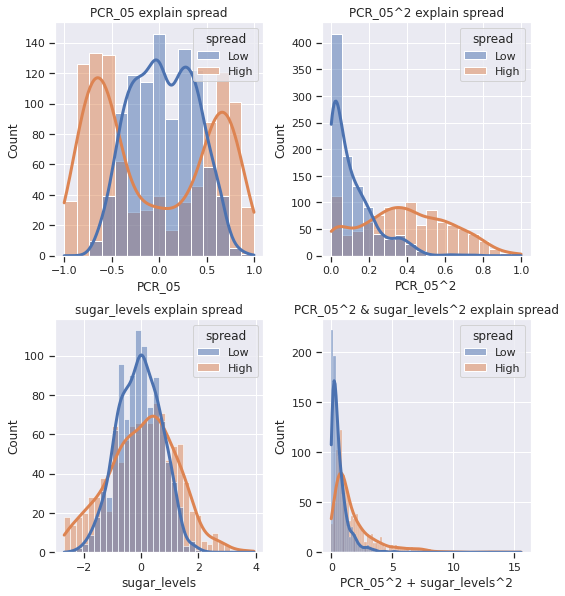

In [90]:
# Drawing PCR_05 and sugar level together in several variations
tmp = train.copy()
tmp['PCR_05^2'] = tmp.PCR_05 ** 2
tmp['sugar_levels^2'] = tmp.sugar_levels ** 2
tmp['PCR_05^2 + sugar_levels^2'] = tmp['PCR_05^2'] + tmp['sugar_levels^2']

plt.figure(figsize=(4 * 2, 4 * 3))

ax = plt.subplot(3, 2, 1)
plt.title("PCR_05 explain spread")
sns.histplot(data=tmp, x="PCR_05", kde=True, hue="spread", line_kws={"linewidth": 3})

ax = plt.subplot(3, 2, 2)
plt.title("PCR_05^2 explain spread")
sns.histplot(data=tmp, x="PCR_05^2", kde=True, hue="spread", line_kws={"linewidth": 3})

ax = plt.subplot(3,  2, 3)
plt.title("sugar_levels explain spread")

sns.histplot(data=tmp, x="sugar_levels", kde=True, hue="spread", line_kws={"linewidth": 3})
ax = plt.subplot(3,  2, 4)
plt.title("PCR_05^2 & sugar_levels^2 explain spread")
sns.histplot(data=tmp, x="PCR_05^2 + sugar_levels^2", kde=True, hue="spread", line_kws={"linewidth": 3})

plt.tight_layout()


### Perform automatic feature selection for covid

In [91]:
# Automatic feature selection for covid
COL_NAME = ['age', 'sex', 'weight', 'blood_type_A+', 'blood_type_A-',
            'blood_type_AB+', 'blood_type_AB-', 'blood_type_B+',
            'blood_type_O+', 'blood_type_O-',
            'num_of_siblings', 'happiness_score',
            'household_income', 'conversations_per_day', 'sugar_levels',
            'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
            'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
            'cough', 'low_appetite', 'sore_throat', 'fever', 'shortness_of_breath',
            'x_coord', 'y_coord', 'year', 'month', 'region_0', 'region_1',
            'region_2', 'region_3', 'region_4', 'region_5', 'region_6',
            'region_7', 'region_8', 'region_9']
X = train[COL_NAME]
y = train["covid"]
knn = KNeighborsClassifier(n_neighbors=5)

# Selecting 2 features
sfs = SequentialFeatureSelector(knn, n_features_to_select=2)
sfs.fit(X, y)
indices = sfs.get_support(indices=True)
print("The selected features are: ")
print(COL_NAME[indices[0]], COL_NAME[indices[1]])

The selected features are: 
sex sore_throat


In [92]:
train.groupby(["sore_throat", "sex"]).covid.value_counts()

sore_throat  sex   covid
-1.0         -1.0  False    431
                   True     166
              1.0  False    583
                   True     212
 1.0         -1.0  True     360
                   False      1
              1.0  True     247
Name: covid, dtype: int64

In [93]:
train.groupby(["sore_throat", "shortness_of_breath"]).covid.value_counts()

sore_throat  shortness_of_breath  covid
-1.0         -1.0                 False    1003
                                  True      272
              1.0                 True      106
                                  False      11
 1.0         -1.0                 True      555
                                  False       1
              1.0                 True       52
Name: covid, dtype: int64

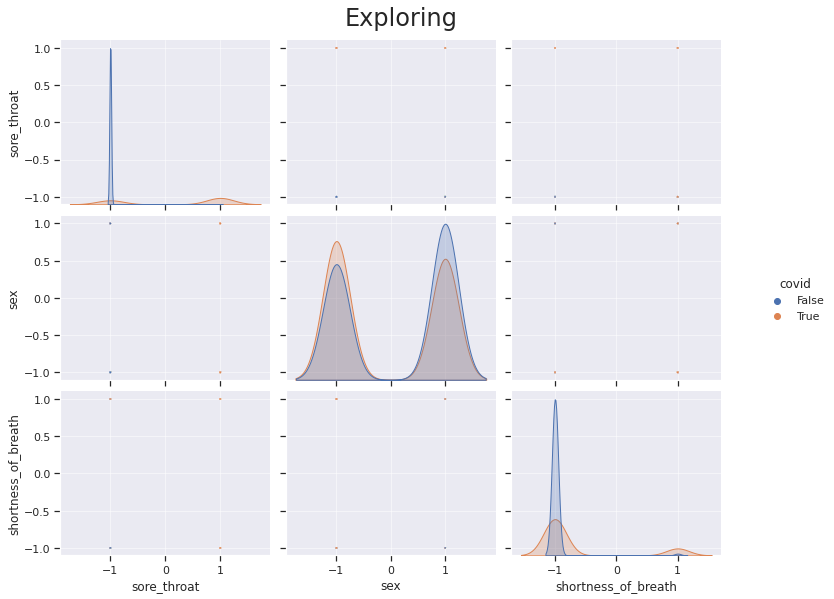

In [94]:
draw_pairplot(features=["sore_throat", "sex", "shortness_of_breath"], hue="covid", title="Exploring")

### Crafting new features

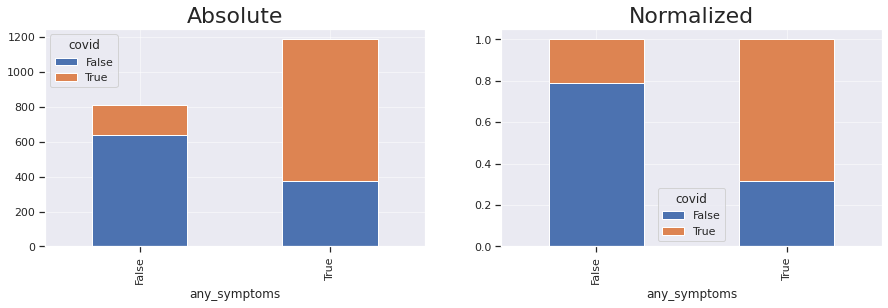

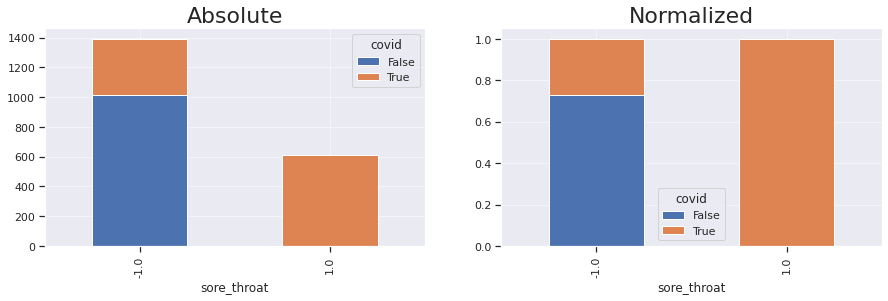

In [95]:
# Craft 'any_symptoms' feature, and analyze it
train2 = train.copy()
symptoms = ["cough", "low_appetite", "sore_throat", "fever", "shortness_of_breath"]
train2["any_symptoms"] = np.any(train2[symptoms] == 1, axis=1)
plot_normsalized_categorical_feature("any_symptoms", "covid", train2)
plot_normsalized_categorical_feature("sore_throat", "covid", train2)


# Part 6

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# ----- extracting new features ------
def extract_new_features(df):
    """
    Adding the new features we need out of the given ones. 
    """
    for symptom in ["cough", "low_appetite", "sore_throat", "fever", "shortness_of_breath"]:
        df[symptom] = df.symptoms.str.contains(symptom).map({True:1, False:-1, np.nan:-1})
    df.drop(['symptoms'], axis=1, inplace=True)
    df["sex"] = df.sex.map({'F':1, 'M':-1, np.nan:np.nan})
    return df

# ----- imputing missing data ------
def random_sample_imputation(data, col, train):
    data.loc[data[col].isna(), col] = train[col].dropna().sample(data[col].isna().sum(), random_state=29).tolist()

def median_imputation_according_to_bins(col_to_impute, according_to_col, bins, df, train):
    # Impute col_to_impute using the median within according_to_col, using bins
    filler_values = train.groupby(pd.cut(train[according_to_col], bins)).median()[col_to_impute]
    for n, g in df.groupby(pd.cut(df[according_to_col], bins)):
        df.loc[g.index, col_to_impute] = df.loc[g.index, col_to_impute].fillna(filler_values[n])

def impute_missing_data(df, train):
    """
    Impute the missing data in the same methods as described in the report. 
    We impute only needed features - if a feature is imputed according to another one - impute it as well to complete the procces. 
    PCR_01 - median imputation
    PCR_04 - Was already full in the train we got - in case it is needed in df - median  
    PCR_08 - Was already full in the train we got - in case it is needed in df - random since the dist. isn't gaussian 
    PCR_09 - Impute according to PCR_04 (correlated)
    PCR_10 - Was already full in the train we got - in case it is needed in df - random since the dist. isn't gaussian 
    PCR_05 - Impute according to PCR_09 (correlated)
    age - Impute according to weight, in case they are both missing - median. 
    weight - Impute according to age (correlated)
    sugar_levels - Impute according to weight (correlated)
    sore_throat - Already imputed (since we consider nan in the symptoms col as "no symptoms")
    sport_activity - Impute according to sugar_levels (correlated)
    sex - random sample imputation
    """
    # median impute
    median_impute = ['PCR_04', 'PCR_01']
    values_for_impute_median = train[median_impute].median()
    df[median_impute] = df[median_impute].fillna(values_for_impute_median)
    train[median_impute] = train[median_impute].fillna(values_for_impute_median)

    # random impute 
    random_impute = ['PCR_08', 'PCR_10', 'sex']
    for col in random_impute:
        random_sample_imputation(df, col, train)
        random_sample_imputation(train, col, train)

    # special imputes
    median_imputation_according_to_bins('age', 'weight', np.arange(0, 200, 10), df, train)
    median_imputation_according_to_bins('age', 'weight', np.arange(0, 200, 10), train, train)
    df['age'] = df['age'].fillna(train['age'].median())
    train['age'] = train['age'].fillna(train['age'].median())

    impute_according_to_other_column = [('PCR_09', 'PCR_04', np.arange(0, 15)), 
                                        ('PCR_05', 'PCR_09', np.arange(-30, 30)),
                                        ('weight', 'age', np.arange(0, 150, 5)),
                                        ('sugar_levels', 'weight', np.arange(0, 200, 5)),
                                        ('sport_activity', 'sugar_levels', np.arange(0, 180, 10))]
    for to_impute, according_to, bins in impute_according_to_other_column:
        median_imputation_according_to_bins(to_impute, according_to, bins, df, train)
        median_imputation_according_to_bins(to_impute, according_to, bins, train, train)
    return df, train

# ----- normalize data ------
def normalize_data(df, train):
    """
    Normalize data in the same methods as described in the report.
    """
    # MinMax
    min_max_features = ['sport_activity', 'PCR_01', 'PCR_04', 'PCR_05', 'PCR_08', 'PCR_10', 'sore_throat']
    min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
    min_max_scaler.fit(train[min_max_features])
    df[min_max_features] = min_max_scaler.transform(df[min_max_features])

    # Standard
    standard_features = ['sugar_levels']
    standard_scaler = StandardScaler()
    standard_scaler.fit(train[standard_features])
    df[standard_features] = standard_scaler.transform(df[standard_features])
    return df

# ----- main function -----
def prepare_data(data, training_data):
    data_to_clean = data.copy()
    clean_train = training_data.copy()

    data_to_clean = extract_new_features(data_to_clean)
    clean_train = extract_new_features(clean_train)

    data_to_clean, clean_train = impute_missing_data(data_to_clean, clean_train)
    data_to_clean = normalize_data(data_to_clean, clean_train)

    features_to_keep = ["sex", "sugar_levels", "sport_activity", "sore_throat", "PCR_01", "PCR_04", "PCR_05", "PCR_08", "PCR_10"]
    data_to_clean.drop([col for col in data_to_clean.columns if col not in features_to_keep], axis=1, inplace=True)

    return data_to_clean
    

In [ ]:
# Apply prepare data function to train and data, and save as csv

# Upload the files again to make sure everything go smoothly
!rm *.csv
from google.colab import files
import sklearn.model_selection as model_selection
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]
dataset = pd.read_csv(filename)
train, test = model_selection.train_test_split(dataset, test_size=0.2, random_state=29)

train_df_clean = prepare_data(train, train)
train_df_clean.to_csv("train.csv")
files.download("train.csv") 
test_df_clean = prepare_data(test, train)
test_df_clean.to_csv("test.csv")
files.download("test.csv") 



In [ ]:
# Make sure there arent any missing values
train_df_clean.isnull().values.any()
test_df_clean.isnull().values.any()